In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [108]:
# Import the data and print the first three rows
recipe = pd.read_csv("C:/Users/awand/Downloads/RAW_recipes.csv/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [110]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [111]:
# 1. One column for each nutrition type
recipe[
    [
        "calories",
        "total fat (PDV%)",
        "sugar (PDV%)",
        "sodium (PDV%)",
        "protein (PDV%)",
        "saturated fat (PDV%)",
        "carbohydrates (PDV%)",
    ]
] = recipe.nutrition.str.split(",", expand=True)

# 2. Cleaning the content of "calories" and "carbohydrates (PDV%)"
recipe["calories"] = recipe["calories"].apply(lambda x: x.replace("[", ""))
recipe["carbohydrates (PDV%)"] = recipe["carbohydrates (PDV%)"].apply(
    lambda x: x.replace("]", "")
)

# 3. Changer le type des colonnes en float
recipe[
    [
        "calories",
        "total fat (PDV%)",
        "sugar (PDV%)",
        "sodium (PDV%)",
        "protein (PDV%)",
        "saturated fat (PDV%)",
        "carbohydrates (PDV%)",
    ]
] = recipe[
    [
        "calories",
        "total fat (PDV%)",
        "sugar (PDV%)",
        "sodium (PDV%)",
        "protein (PDV%)",
        "saturated fat (PDV%)",
        "carbohydrates (PDV%)",
    ]
].astype(
    "float"
)

recipe[
    [
        "calories",
        "total fat (PDV%)",
        "sugar (PDV%)",
        "sodium (PDV%)",
        "protein (PDV%)",
        "saturated fat (PDV%)",
        "carbohydrates (PDV%)",
    ]
].isna().sum()

calories                0
total fat (PDV%)        0
sugar (PDV%)            0
sodium (PDV%)           0
protein (PDV%)          0
saturated fat (PDV%)    0
carbohydrates (PDV%)    0
dtype: int64

In [112]:
# Missing values
print("Total number of missing values:", recipe.isnull().sum().sum())
# print("Same with the na function", recipe.isna().sum())

Total number of missing values: 4980


In [113]:
# In details
print("Per variable", recipe.isna().sum())

Per variable name                       1
id                         0
minutes                    0
contributor_id             0
submitted                  0
tags                       0
nutrition                  0
n_steps                    0
steps                      0
description             4979
ingredients                0
n_ingredients              0
calories                   0
total fat (PDV%)           0
sugar (PDV%)               0
sodium (PDV%)              0
protein (PDV%)             0
saturated fat (PDV%)       0
carbohydrates (PDV%)       0
dtype: int64


In [114]:
# Suppression des lignes avec des valeurs manquantes dans n'importe quelle colonne
recipe_nona = recipe.dropna()

# Afficher le résultat
print("Nombre de lignes après suppression :", len(recipe_nona))

Nombre de lignes après suppression : 226657


In [115]:
recipe_nona.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


les stats descriptives des variables numériques montrent qu'il y a des valeurs irréalistes pour la variable minutes. Pour la variable n_steps, le minimum avec 0 étape peut paraître égalment irréaliste. Pour la variable du nombre d'ingrédients rien de particuliers jusqu'à présent montre quelque chose d'irraéliste. Il est posssible d'avoir une recette avec un seul ingrédient ou avec 43 ingrédients. 

In [116]:
recipe_nona.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%)
count,226657.000000,2.266570e+05,2.266570e+05,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000,226657.000000
mean,226097.564368,9.602472e+03,5.655471e+06,9.773927,9.054170,471.662774,35.936406,83.447059,30.063581,34.600458,45.364816,15.450752
std,139802.640862,4.510715e+06,1.008784e+08,5.999824,3.740942,1194.845397,77.733347,807.100380,131.863087,58.483655,97.638329,82.482854
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105707.000000,2.000000e+01,5.810400e+04,6.000000,6.000000,174.500000,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,211971.000000,4.000000e+01,1.807890e+05,9.000000,9.000000,313.300000,20.000000,25.000000,15.000000,18.000000,23.000000,9.000000
75%,336737.000000,6.500000e+01,4.091060e+05,12.000000,11.000000,518.700000,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000


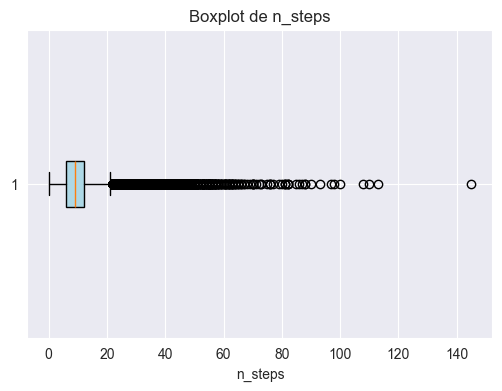

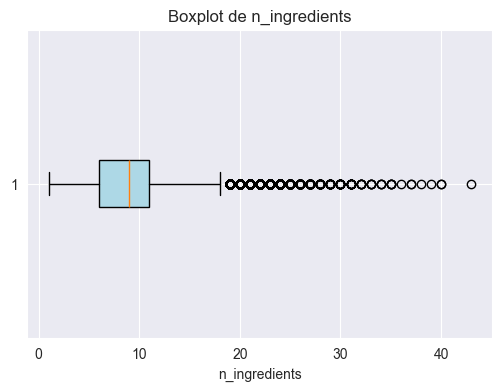

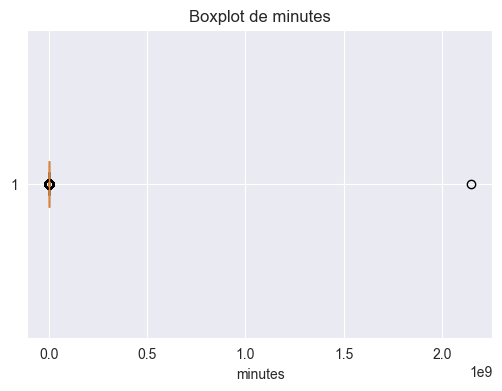

In [117]:
# Liste des colonnes pour lesquelles créer des boxplots
numeric_columns = ["n_steps", "n_ingredients", "minutes"]

# Création des boxplots
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        recipe_nona[column],
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue"),
    )
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

In [118]:
# Average time
avg_time = recipe_nona["minutes"].mean()
print("Average time for recipes: ", avg_time)

Average time for recipes:  9602.472193667083


In [119]:
# Get hours with floor division
hours = avg_time // 60

# Get minutes with modulus
minutes = avg_time % 60

print("Average time is {} hours and {} minutes!".format(round(hours), round(minutes)))

Average time is 160 hours and 2 minutes!


In [120]:
print("Maximum cooking time", recipe_nona["minutes"].max())
print("Minimum cooking time", recipe_nona["minutes"].min())

Maximum cooking time 2147483647
Minimum cooking time 0


Skewness de minutes : 476.082
La distribution est asymétrique.


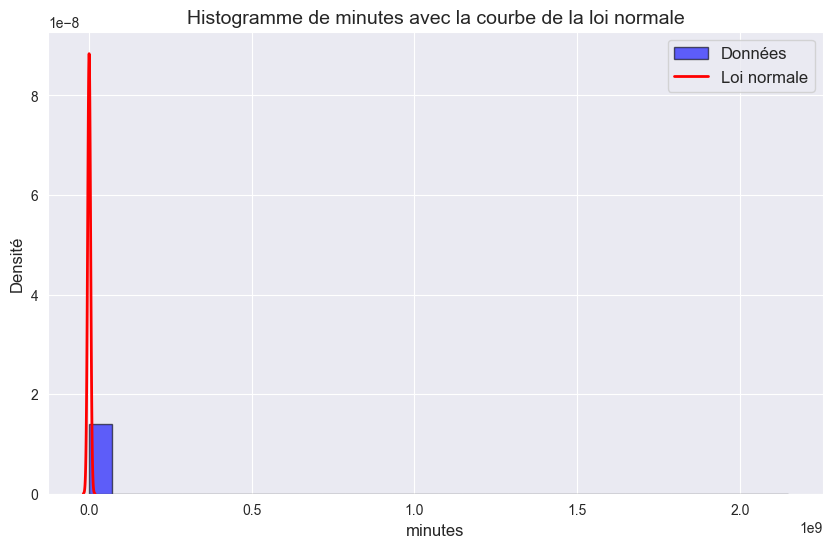

In [121]:
from scipy.stats import skew, norm


# Fonction pour analyser la symétrie, tracer l'histogramme et superposer la loi normale
def analyze_distribution(recipe_nona, column):
    # Calcul de la skewness
    skewness = skew(recipe_nona[column])
    print(f"Skewness de {column} : {skewness:.3f}")
    if abs(skewness) < 0.5:
        print("La distribution semble symétrique.")
    else:
        print("La distribution est asymétrique.")

    # Histogramme et loi normale
    plt.figure(figsize=(10, 6))

    # Histogrammeh
    plt.hist(
        recipe_nona[column],
        bins=30,
        density=True,
        alpha=0.6,
        color="blue",
        edgecolor="black",
        label="Données",
    )

    # Superposition de la loi normale
    mu, std = np.mean(recipe_nona[column]), np.std(recipe_nona[column])
    x = np.linspace(mu - 4 * std, mu + 4 * std, 100)
    pdf = norm.pdf(x, mu, std)
    plt.plot(x, pdf, "red", label="Loi normale", linewidth=2)

    # Titres et légendes
    plt.title(f"Histogramme de {column} avec la courbe de la loi normale", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Densité", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


# Appliquer l'analyse à la variable
analyze_distribution(recipe_nona, "minutes")

la variable minutes suit une distribution asymétrique, pour retirer les outiliers nous pouvons utiliser MAD

In [123]:
from statsmodels.robust.scale import mad

# Calcul de la médiane et du MAD
median = recipe_nona["minutes"].median()
mad_value = mad(recipe_nona["minutes"])

# Calcul des bornes
lower_bound = median - 1.5 * mad_value
upper_bound = median + 3.0 * mad_value

# Identifier les indices des outliers
outliers_index = recipe_nona.index[
    (recipe_nona["minutes"] < lower_bound) | (recipe_nona["minutes"] > upper_bound)
]

# Supprimer les lignes avec ces indices
recipe_nona = recipe_nona.drop(index=outliers_index)

<Axes: ylabel='minutes'>

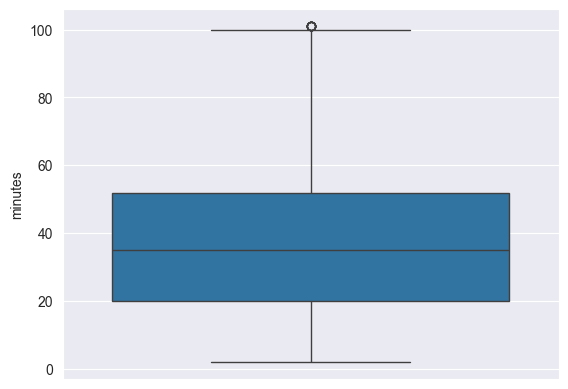

In [124]:
# Boxplot for the continuous variable wo abnormal values
sns.boxplot(recipe_nona["minutes"])

traitement de la variable minutes :

In [125]:
# la base de données recipe contient une variables nutrition intéressante avec valeurs numériques. Split cette variable peut s'avérer intéressante pour la suite.

## Nutrition score processing

# Séparation des colonnes nutritionnelles
recipe_nona[
    [
        "calories",
        "total fat (%)",
        "sugar (%)",
        "sodium (%)",
        "protein (%)",
        "saturated fat (%)",
        "carbohydrates (%)",
    ]
] = recipe_nona["nutrition"].str.split(",", expand=True)

# Suppression des caractères spéciaux
recipe_nona["calories"] = recipe_nona["calories"].apply(lambda x: x.replace("[", ""))
recipe_nona["carbohydrates (%)"] = recipe_nona["carbohydrates (%)"].apply(
    lambda x: x.replace("]", "")
)

# Conversion en float
cols_to_convert = [
    "calories",
    "total fat (%)",
    "sugar (%)",
    "sodium (%)",
    "protein (%)",
    "saturated fat (%)",
    "carbohydrates (%)",
]
recipe_nona[cols_to_convert] = recipe_nona[cols_to_convert].astype(float)

# Vérification des types
print(recipe_nona[cols_to_convert].dtypes)

calories             float64
total fat (%)        float64
sugar (%)            float64
sodium (%)           float64
protein (%)          float64
saturated fat (%)    float64
carbohydrates (%)    float64
dtype: object


In [126]:
recipe_nona.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,195641.000000,195641.000000,1.956410e+05,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000,195641.000000
mean,227764.092864,37.387511,5.365115e+06,9.442550,8.897884,449.061929,34.331878,80.723059,27.635301,31.747466,43.279369,14.899275,34.331878,80.723059,27.635301,31.747466,43.279369,14.899275
std,139542.738148,23.203879,9.798521e+07,5.510163,3.616940,1218.666808,74.887126,854.221616,103.402397,48.466766,90.553788,86.865493,74.887126,854.221616,103.402397,48.466766,90.553788,86.865493
min,40.000000,2.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107808.000000,20.000000,5.888600e+04,6.000000,6.000000,169.700000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000
50%,214572.000000,35.000000,1.849050e+05,8.000000,9.000000,303.100000,20.000000,24.000000,14.000000,17.000000,22.000000,9.000000,20.000000,24.000000,14.000000,17.000000,22.000000,9.000000
75%,338623.000000,52.000000,4.176050e+05,12.000000,11.000000,499.400000,39.000000,66.000000,31.000000,47.000000,50.000000,16.000000,39.000000,66.000000,31.000000,47.000000,50.000000,16.000000
max,537716.000000,101.000000,2.002290e+09,97.000000,43.000000,434360.200000,17183.000000,362729.000000,14664.000000,6552.000000,10395.000000,36098.000000,17183.000000,362729.000000,14664.000000,6552.000000,10395.000000,36098.000000


In [127]:
# Missing values
print("Total number of missing values:", recipe_nona.isnull().sum().sum())
# print("Same with the na function", recipe_nona.isna().sum())

Total number of missing values: 0


In [128]:
# In details
print("Per variable", recipe_nona.isna().sum())

Per variable name                    0
id                      0
minutes                 0
contributor_id          0
submitted               0
tags                    0
nutrition               0
n_steps                 0
steps                   0
description             0
ingredients             0
n_ingredients           0
calories                0
total fat (PDV%)        0
sugar (PDV%)            0
sodium (PDV%)           0
protein (PDV%)          0
saturated fat (PDV%)    0
carbohydrates (PDV%)    0
total fat (%)           0
sugar (%)               0
sodium (%)              0
protein (%)             0
saturated fat (%)       0
carbohydrates (%)       0
dtype: int64


In [129]:
from scipy.stats import skew

# Liste des colonnes à analyser
cols_to_check = [
    "calories",
    "total fat (PDV%)",
    "sugar (PDV%)",
    "sodium (PDV%)",
    "protein (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Analyse de la skewness (symétrie)
for col in cols_to_check:
    data = recipe_nona[col]  # Pas besoin de dropna() si aucune valeur n'est manquante

    # Calcul de la skewness
    skewness_value = skew(data)
    print(f"Skewness de '{col}' : {skewness_value:.3f}")

    # Interprétation de la symétrie
    if abs(skewness_value) < 0.5:
        print(f"'{col}' semble suivre une distribution symétrique (Skewness ≈ 0).")
    elif skewness_value > 0.5:
        print(f"'{col}' est asymétrique à droite (queue à droite).")
    elif skewness_value < -0.5:
        print(f"'{col}' est asymétrique à gauche (queue à gauche).")

Skewness de 'calories' : 236.015
'calories' est asymétrique à droite (queue à droite).
Skewness de 'total fat (PDV%)' : 69.978
'total fat (PDV%)' est asymétrique à droite (queue à droite).
Skewness de 'sugar (PDV%)' : 391.435
'sugar (PDV%)' est asymétrique à droite (queue à droite).
Skewness de 'sodium (PDV%)' : 50.940
'sodium (PDV%)' est asymétrique à droite (queue à droite).
Skewness de 'protein (PDV%)' : 32.137
'protein (PDV%)' est asymétrique à droite (queue à droite).
Skewness de 'saturated fat (PDV%)' : 20.097
'saturated fat (PDV%)' est asymétrique à droite (queue à droite).
Skewness de 'carbohydrates (PDV%)' : 367.009
'carbohydrates (PDV%)' est asymétrique à droite (queue à droite).


les distributions sont asymétriques on retire les outliers en utilisant MAD 

Analyse pour : calories


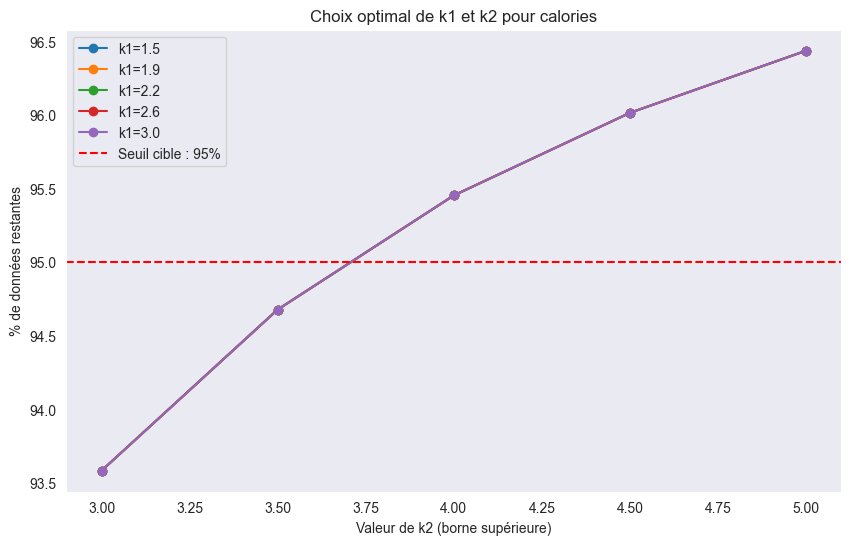

Optimal k1 pour calories: 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -38.936332   987.172664          93.585189
1   1.500  3.5   -38.936332  1101.184774          94.679029
2   1.500  4.0   -38.936332  1215.196885          95.453918
3   1.500  4.5   -38.936332  1329.208995          96.014639
4   1.500  5.0   -38.936332  1443.221106          96.436330
5   1.875  3.0  -124.445415   987.172664          93.585189
6   1.875  3.5  -124.445415  1101.184774          94.679029
7   1.875  4.0  -124.445415  1215.196885          95.453918
8   1.875  4.5  -124.445415  1329.208995          96.014639
9   1.875  5.0  -124.445415  1443.221106          96.436330
10  2.250  3.0  -209.954498   987.172664          93.585189
11  2.250  3.5  -209.954498  1101.184774          94.679029
12  2.250  4.0  -209.954498  1215.196885          95.453918
13  2.250  4.5  -209.954498  1329.208995          96.014639
14  2.250  5.0  -209.954498  1443.221106          96.

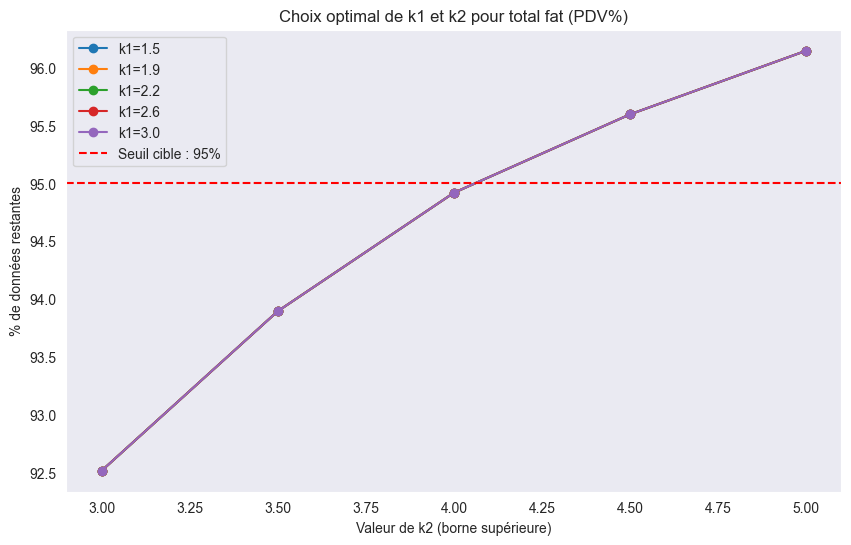

Optimal k1 pour total fat (PDV%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -11.134647    82.269293          92.520484
1   1.500  3.5   -11.134647    92.647509          93.896985
2   1.500  4.0   -11.134647   103.025724          94.918754
3   1.500  4.5   -11.134647   113.403940          95.595504
4   1.500  5.0   -11.134647   123.782155          96.144469
5   1.875  3.0   -18.918308    82.269293          92.520484
6   1.875  3.5   -18.918308    92.647509          93.896985
7   1.875  4.0   -18.918308   103.025724          94.918754
8   1.875  4.5   -18.918308   113.403940          95.595504
9   1.875  5.0   -18.918308   123.782155          96.144469
10  2.250  3.0   -26.701970    82.269293          92.520484
11  2.250  3.5   -26.701970    92.647509          93.896985
12  2.250  4.0   -26.701970   103.025724          94.918754
13  2.250  4.5   -26.701970   113.403940          95.595504
14  2.250  5.0   -26.701970   123.782155     

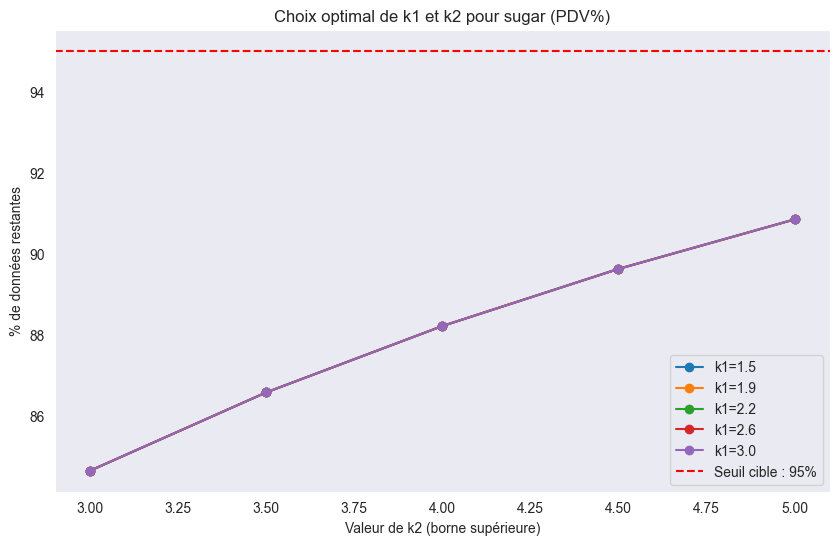

Optimal k1 pour sugar (PDV%): None, Optimal k2: None
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -18.254163   108.508326          84.659146
1   1.500  3.5   -18.254163   122.593048          86.586656
2   1.500  4.0   -18.254163   136.677769          88.220772
3   1.500  4.5   -18.254163   150.762490          89.627430
4   1.500  5.0   -18.254163   164.847211          90.846499
5   1.875  3.0   -28.817704   108.508326          84.659146
6   1.875  3.5   -28.817704   122.593048          86.586656
7   1.875  4.0   -28.817704   136.677769          88.220772
8   1.875  4.5   -28.817704   150.762490          89.627430
9   1.875  5.0   -28.817704   164.847211          90.846499
10  2.250  3.0   -39.381245   108.508326          84.659146
11  2.250  3.5   -39.381245   122.593048          86.586656
12  2.250  4.0   -39.381245   136.677769          88.220772
13  2.250  4.5   -39.381245   150.762490          89.627430
14  2.250  5.0   -39.381245   164.847211       

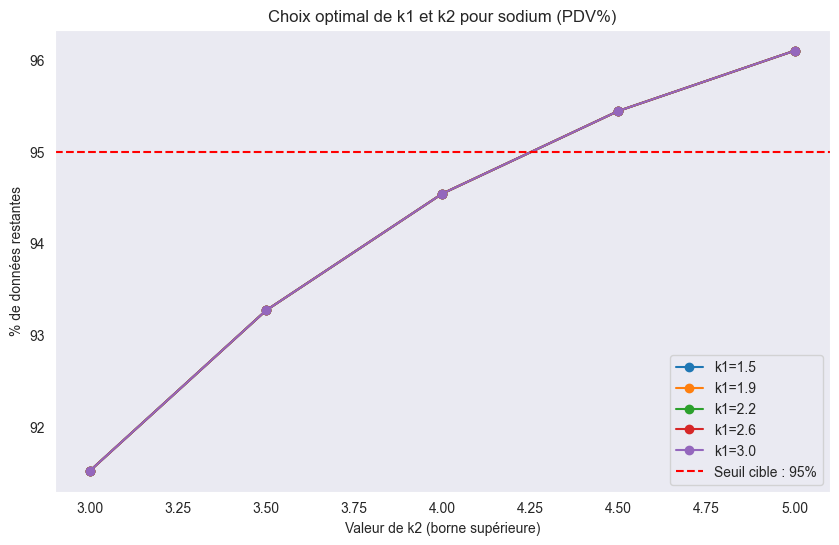

Optimal k1 pour sodium (PDV%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -10.462937    62.925873          91.519671
1   1.500  3.5   -10.462937    71.080185          93.268282
2   1.500  4.0   -10.462937    79.234498          94.541022
3   1.500  4.5   -10.462937    87.388810          95.442673
4   1.500  5.0   -10.462937    95.543122          96.099488
5   1.875  3.0   -16.578671    62.925873          91.519671
6   1.875  3.5   -16.578671    71.080185          93.268282
7   1.875  4.0   -16.578671    79.234498          94.541022
8   1.875  4.5   -16.578671    87.388810          95.442673
9   1.875  5.0   -16.578671    95.543122          96.099488
10  2.250  3.0   -22.694405    62.925873          91.519671
11  2.250  3.5   -22.694405    71.080185          93.268282
12  2.250  4.0   -22.694405    79.234498          94.541022
13  2.250  4.5   -22.694405    87.388810          95.442673
14  2.250  5.0   -22.694405    95.543122        

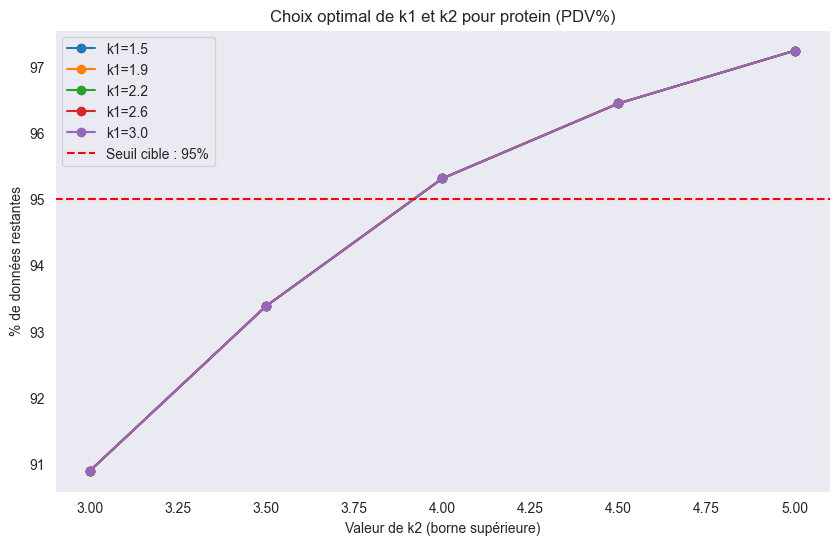

Optimal k1 pour protein (PDV%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -14.134647    79.269293          90.891991
1   1.500  3.5   -14.134647    89.647509          93.383800
2   1.500  4.0   -14.134647   100.025724          95.313355
3   1.500  4.5   -14.134647   110.403940          96.448597
4   1.500  5.0   -14.134647   120.782155          97.246487
5   1.875  3.0   -21.918308    79.269293          90.891991
6   1.875  3.5   -21.918308    89.647509          93.383800
7   1.875  4.0   -21.918308   100.025724          95.313355
8   1.875  4.5   -21.918308   110.403940          96.448597
9   1.875  5.0   -21.918308   120.782155          97.246487
10  2.250  3.0   -29.701970    79.269293          90.891991
11  2.250  3.5   -29.701970    89.647509          93.383800
12  2.250  4.0   -29.701970   100.025724          95.313355
13  2.250  4.5   -29.701970   110.403940          96.448597
14  2.250  5.0   -29.701970   120.782155       

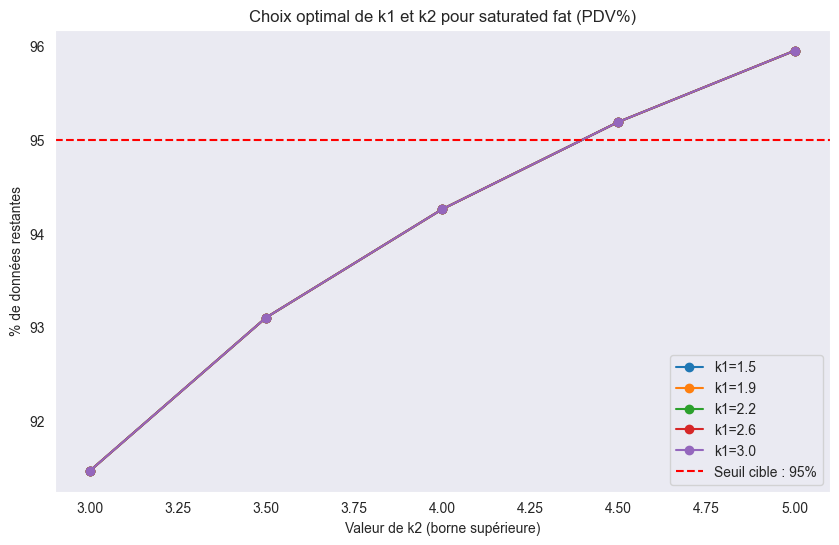

Optimal k1 pour saturated fat (PDV%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0   -18.030260    102.06052          91.467535
1   1.500  3.5   -18.030260    115.40394          93.101650
2   1.500  4.0   -18.030260    128.74736          94.257850
3   1.500  4.5   -18.030260    142.09078          95.188636
4   1.500  5.0   -18.030260    155.43420          95.948191
5   1.875  3.0   -28.037825    102.06052          91.467535
6   1.875  3.5   -28.037825    115.40394          93.101650
7   1.875  4.0   -28.037825    128.74736          94.257850
8   1.875  4.5   -28.037825    142.09078          95.188636
9   1.875  5.0   -28.037825    155.43420          95.948191
10  2.250  3.0   -38.045390    102.06052          91.467535
11  2.250  3.5   -38.045390    115.40394          93.101650
12  2.250  4.0   -38.045390    128.74736          94.257850
13  2.250  4.5   -38.045390    142.09078          95.188636
14  2.250  5.0   -38.045390    155.43420 

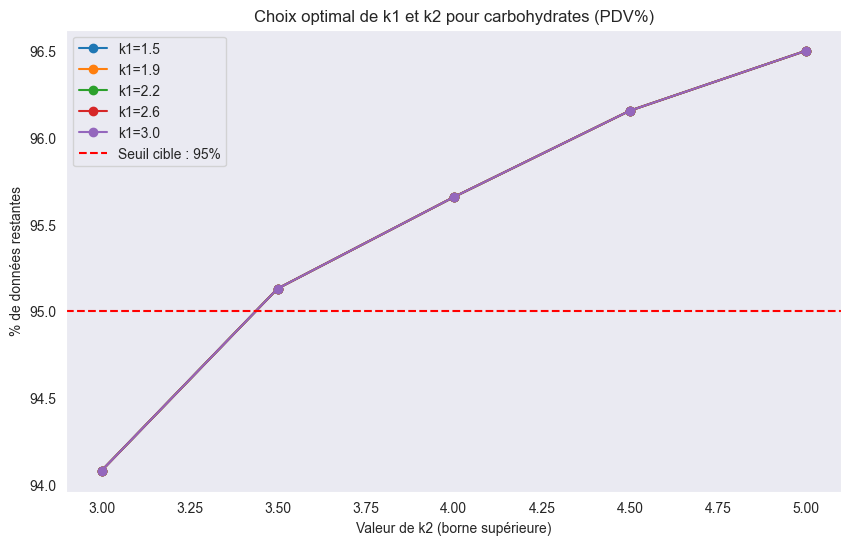

Optimal k1 pour carbohydrates (PDV%): 1.5, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0    -4.343420    35.686840          94.082529
1   1.500  3.5    -4.343420    40.134647          95.130877
2   1.500  4.0    -4.343420    44.582453          95.657352
3   1.500  4.5    -4.343420    49.030260          96.154692
4   1.500  5.0    -4.343420    53.478067          96.499711
5   1.875  3.0    -7.679275    35.686840          94.082529
6   1.875  3.5    -7.679275    40.134647          95.130877
7   1.875  4.0    -7.679275    44.582453          95.657352
8   1.875  4.5    -7.679275    49.030260          96.154692
9   1.875  5.0    -7.679275    53.478067          96.499711
10  2.250  3.0   -11.015130    35.686840          94.082529
11  2.250  3.5   -11.015130    40.134647          95.130877
12  2.250  4.0   -11.015130    44.582453          95.657352
13  2.250  4.5   -11.015130    49.030260          96.154692
14  2.250  5.0   -11.015130    53.478067 

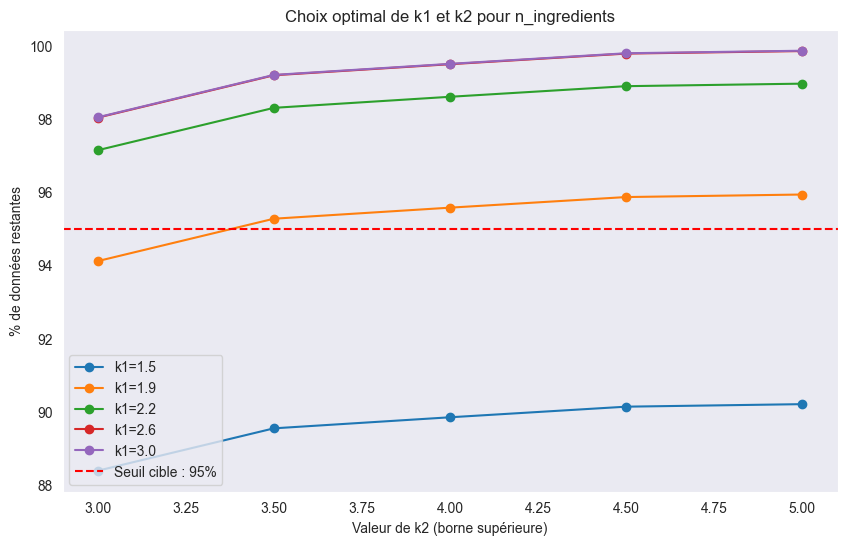

Optimal k1 pour n_ingredients: 3.0, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0     4.552193    17.895613          88.396604
1   1.500  3.5     4.552193    19.378216          89.552803
2   1.500  4.0     4.552193    20.860818          89.854376
3   1.500  4.5     4.552193    22.343420          90.143682
4   1.500  5.0     4.552193    23.826022          90.212685
5   1.875  3.0     3.440242    17.895613          94.114731
6   1.875  3.5     3.440242    19.378216          95.270930
7   1.875  4.0     3.440242    20.860818          95.572503
8   1.875  4.5     3.440242    22.343420          95.861808
9   1.875  5.0     3.440242    23.826022          95.930812
10  2.250  3.0     2.328290    17.895613          97.139148
11  2.250  3.5     2.328290    19.378216          98.295347
12  2.250  4.0     2.328290    20.860818          98.596920
13  2.250  4.5     2.328290    22.343420          98.886225
14  2.250  5.0     2.328290    23.826022        

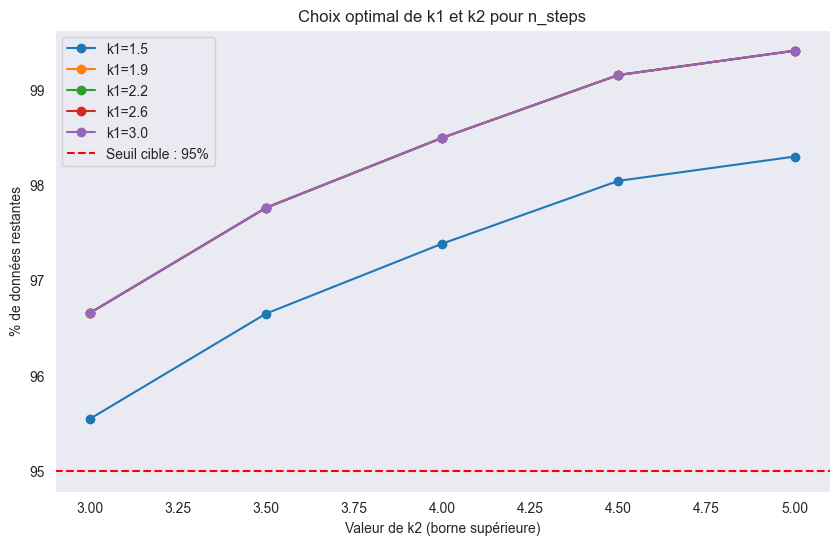

Optimal k1 pour n_steps: 1.875, Optimal k2: 5.0
       k1   k2  lower_bound  upper_bound  percent_remaining
0   1.500  3.0     1.328290    21.343420          95.545412
1   1.500  3.5     1.328290    23.567323          96.650498
2   1.500  4.0     1.328290    25.791227          97.385006
3   1.500  4.5     1.328290    28.015130          98.044377
4   1.500  5.0     1.328290    30.239033          98.299436
5   1.875  3.0    -0.339637    21.343420          96.657142
6   1.875  3.5    -0.339637    23.567323          97.762228
7   1.875  4.0    -0.339637    25.791227          98.496736
8   1.875  4.5    -0.339637    28.015130          99.156107
9   1.875  5.0    -0.339637    30.239033          99.411166
10  2.250  3.0    -2.007565    21.343420          96.657142
11  2.250  3.5    -2.007565    23.567323          97.762228
12  2.250  4.0    -2.007565    25.791227          98.496736
13  2.250  4.5    -2.007565    28.015130          99.156107
14  2.250  5.0    -2.007565    30.239033          99

In [130]:
from statsmodels.robust.scale import mad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des colonnes à analyser
cols_to_check = [
    "calories",
    "total fat (PDV%)",
    "sugar (PDV%)",
    "sodium (PDV%)",
    "protein (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
    "n_ingredients",
    "n_steps",
]


# Fonction pour tester différentes combinaisons de k1 et k2
def find_optimal_k1_k2(data, col, k1_values, k2_values, target_percent=95):
    median = data[col].median()
    mad_value = mad(data[col])
    optimal_k1, optimal_k2 = None, None
    optimal_percent = 0

    results = []

    for k1 in k1_values:
        for k2 in k2_values:
            # Calcul des bornes
            lower_bound = median - k1 * mad_value
            upper_bound = median + k2 * mad_value

            # Filtrer les données
            filtered_data = data[
                (data[col] >= lower_bound) & (data[col] <= upper_bound)
            ]
            percent_remaining = len(filtered_data) / len(data) * 100

            # Stocker les résultats
            results.append(
                {
                    "k1": k1,
                    "k2": k2,
                    "lower_bound": lower_bound,
                    "upper_bound": upper_bound,
                    "percent_remaining": percent_remaining,
                }
            )

            # Mise à jour des k1 et k2 optimaux
            if (
                percent_remaining >= target_percent
                and percent_remaining > optimal_percent
            ):
                optimal_k1, optimal_k2 = k1, k2
                optimal_percent = percent_remaining

    return pd.DataFrame(results), optimal_k1, optimal_k2


# Tester pour toutes les colonnes
k1_values = np.linspace(1.5, 3, 5)  # Tester k1 entre 1.5 et 3
k2_values = np.linspace(3, 5, 5)  # Tester k2 entre 3 et 5
target_percent = 95  # Seuil cible pour le pourcentage de données conservées

optimal_k_values = {}

# Appliquer le calcul pour toutes les colonnes
for col in cols_to_check:
    print(f"Analyse pour : {col}")
    results, optimal_k1, optimal_k2 = find_optimal_k1_k2(
        recipe_nona, col, k1_values, k2_values, target_percent
    )

    # Stocker les k1 et k2 optimaux pour chaque colonne
    optimal_k_values[col] = {"k1": optimal_k1, "k2": optimal_k2}

    # Afficher les résultats pour cette colonne
    plt.figure(figsize=(10, 6))
    for k1 in k1_values:
        subset = results[results["k1"] == k1]
        plt.plot(
            subset["k2"], subset["percent_remaining"], marker="o", label=f"k1={k1:.1f}"
        )
    plt.axhline(
        y=target_percent,
        color="r",
        linestyle="--",
        label=f"Seuil cible : {target_percent}%",
    )
    plt.title(f"Choix optimal de k1 et k2 pour {col}")
    plt.xlabel("Valeur de k2 (borne supérieure)")
    plt.ylabel("% de données restantes")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Optimal k1 pour {col}: {optimal_k1}, Optimal k2: {optimal_k2}")
    print(results)

# Résumé des k1 et k2 optimaux
print("\nRésumé des k1 et k2 optimaux :")
for col, k_values in optimal_k_values.items():
    print(f"{col}: k1={k_values['k1']}, k2={k_values['k2']}")

In [131]:
recipe_cleaned = recipe_nona.copy()

In [132]:
recipe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195641 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  195641 non-null  object 
 1   id                    195641 non-null  int64  
 2   minutes               195641 non-null  int64  
 3   contributor_id        195641 non-null  int64  
 4   submitted             195641 non-null  object 
 5   tags                  195641 non-null  object 
 6   nutrition             195641 non-null  object 
 7   n_steps               195641 non-null  int64  
 8   steps                 195641 non-null  object 
 9   description           195641 non-null  object 
 10  ingredients           195641 non-null  object 
 11  n_ingredients         195641 non-null  int64  
 12  calories              195641 non-null  float64
 13  total fat (PDV%)      195641 non-null  float64
 14  sugar (PDV%)          195641 non-null  float64
 15  sodiu

In [133]:
print(recipe_cleaned[cols_to_check].dtypes)

calories                float64
total fat (PDV%)        float64
sugar (PDV%)            float64
sodium (PDV%)           float64
protein (PDV%)          float64
saturated fat (PDV%)    float64
carbohydrates (PDV%)    float64
n_ingredients             int64
n_steps                   int64
dtype: object


In [134]:
from statsmodels.robust.scale import mad
import pandas as pd
import numpy as np

# Appliquer la méthode MAD pour chaque colonne avec les k1 et k2 optimaux
recipe_cleaned = recipe_nona.copy()

# Paramètres par défaut pour k1 et k2
default_k1 = 1.5
default_k2 = 3.0

# Boucle sur les colonnes pour appliquer le nettoyage
for col in cols_to_check:
    # Récupérer les k1 et k2 optimaux pour chaque colonne
    k1 = optimal_k_values[col]["k1"]
    k2 = optimal_k_values[col]["k2"]

    # Vérifier si k1 ou k2 est None, appliquer les valeurs par défaut
    if k1 is None or k2 is None:
        print(
            f"Les valeurs optimales de k1 et k2 pour '{col}' n'ont pas été trouvées. Utilisation des valeurs par défaut."
        )
        k1 = default_k1
        k2 = default_k2

    # Vérifier les données avant de calculer le MAD
    data = recipe_cleaned[col].dropna()  # Exclure les NaN
    if data.empty or len(data.unique()) <= 1:
        print(
            f"Impossible de calculer la MAD pour '{col}' : colonne vide ou valeurs constantes."
        )
        continue  # Passer à la prochaine colonne dans la boucle

    # Calcul de la médiane et du MAD
    median = data.median()
    mad_value = mad(data)

    # Vérifier le MAD
    if mad_value is None or mad_value == 0:
        print(f"MAD non calculable ou nulle pour '{col}'. Colonne ignorée.")
        continue  # Passer à la prochaine colonne dans la boucle

    # Calcul des bornes
    lower_bound = median - k1 * mad_value
    upper_bound = median + k2 * mad_value

    # Filtrer les données pour enlever les outliers
    recipe_cleaned = recipe_cleaned[
        (recipe_cleaned[col] >= lower_bound) & (recipe_cleaned[col] <= upper_bound)
    ]

    # Afficher les résultats
    print(f"\nAprès suppression des outliers pour {col}:")
    print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
    print(f"Nombre de lignes restantes : {len(recipe_cleaned)}")

# Résumé final
print("\nNombre total de lignes après suppression des outliers :")
print(len(recipe_cleaned))


Après suppression des outliers pour calories:
Borne inférieure : -38.93633180924223, Borne supérieure : 1443.2211060308077
Nombre de lignes restantes : 188669

Après suppression des outliers pour total fat (PDV%):
Borne inférieure : -9.910743260859238, Borne supérieure : 115.36914420286413
Nombre de lignes restantes : 185851
Les valeurs optimales de k1 et k2 pour 'sugar (PDV%)' n'ont pas été trouvées. Utilisation des valeurs par défaut.

Après suppression des outliers pour sugar (PDV%):
Borne inférieure : -17.030259899651256, Borne supérieure : 103.06051979930251
Nombre de lignes restantes : 159660

Après suppression des outliers pour sodium (PDV%):
Borne inférieure : -10.462936605342428, Borne supérieure : 95.5431220178081
Nombre de lignes restantes : 156503

Après suppression des outliers pour protein (PDV%):
Borne inférieure : -14.134646588617642, Borne supérieure : 120.78215529539213
Nombre de lignes restantes : 154474

Après suppression des outliers pour saturated fat (PDV%):
Bor

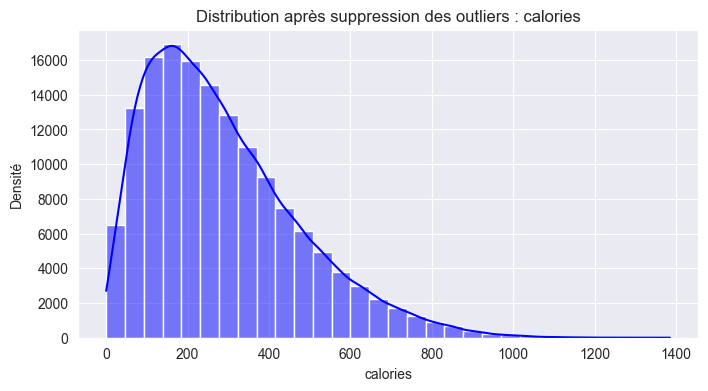

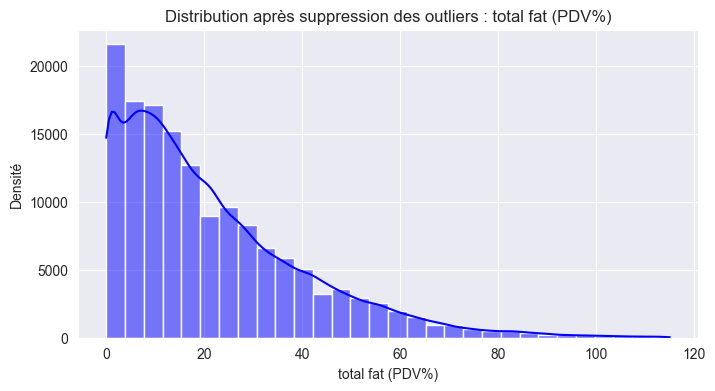

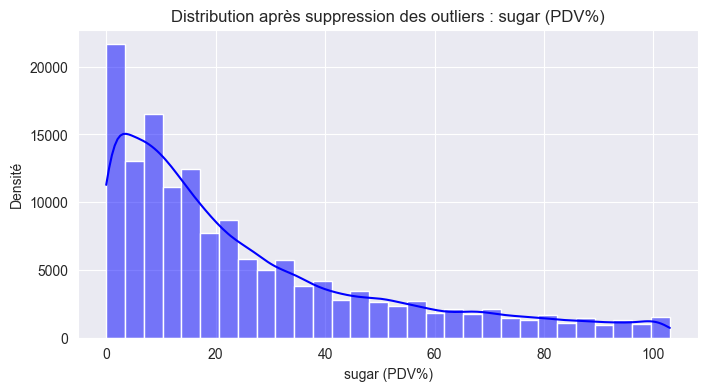

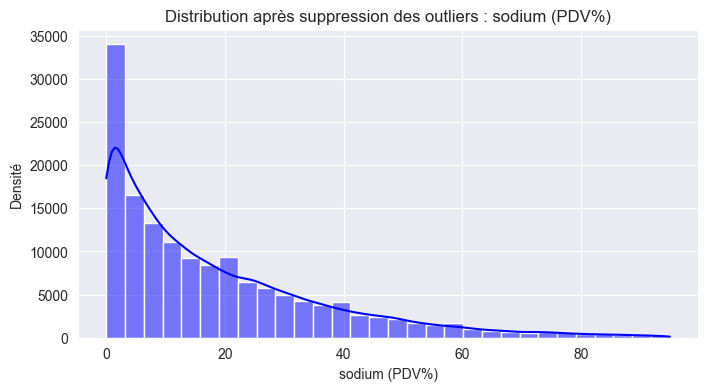

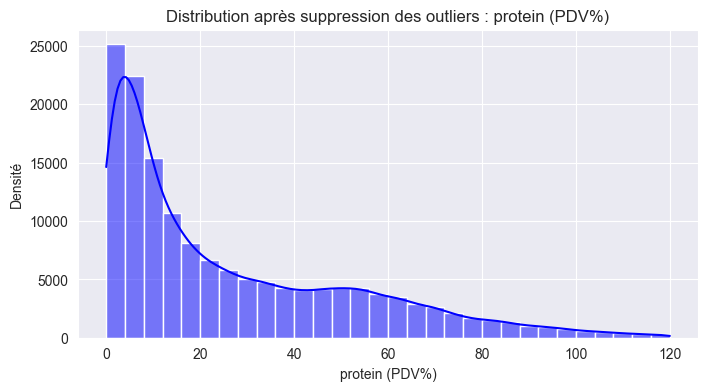

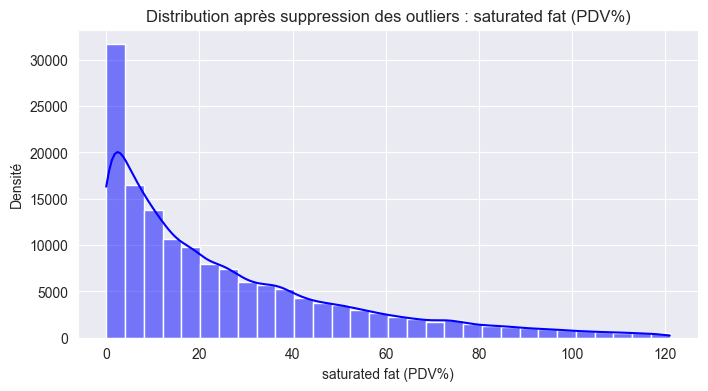

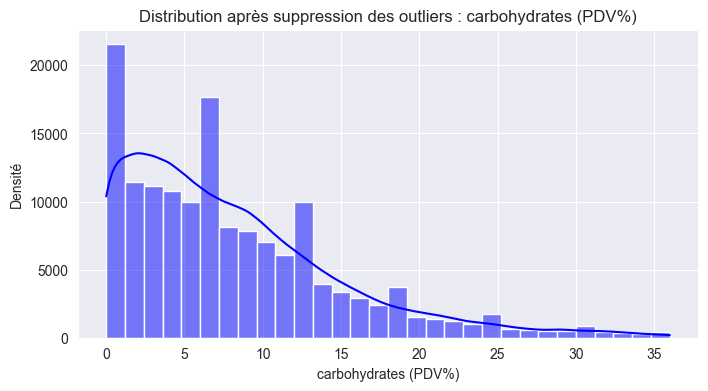

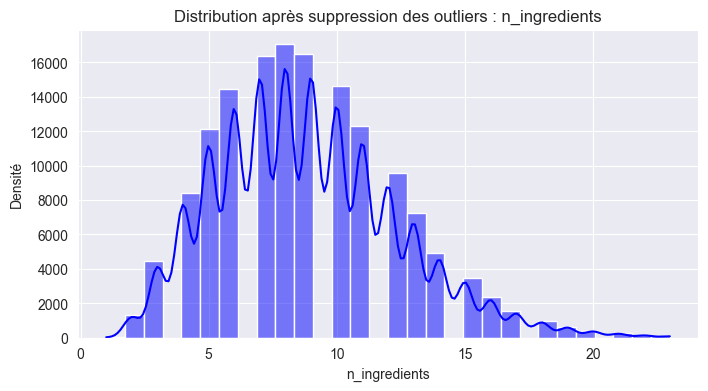

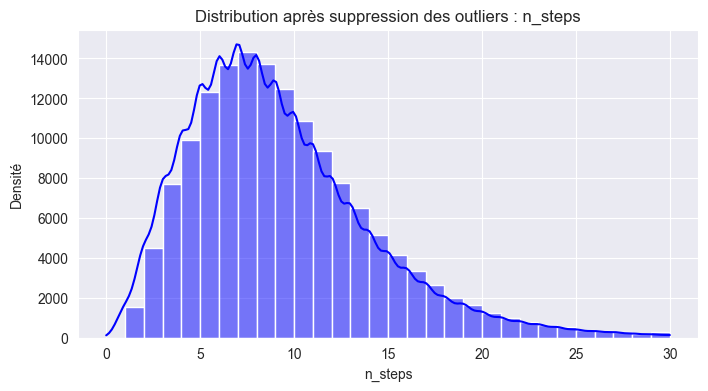

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boucle pour tracer des histogrammes des données nettoyées
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(recipe_cleaned[col].dropna(), bins=30, kde=True, color="blue")
    plt.title(f"Distribution après suppression des outliers : {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.show()

In [136]:
recipe_cleaned.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,149229.000000,149229.000000,1.492290e+05,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000,149229.000000
mean,230778.357049,36.090043,5.263651e+06,9.104913,8.842899,285.783956,21.512601,26.171749,18.391117,26.462444,25.918280,8.159795,21.512601,26.171749,18.391117,26.462444,25.918280,8.159795
std,139046.901293,22.301471,9.688179e+07,4.878991,3.499307,187.065233,19.039357,25.210714,18.560709,26.330491,26.089321,6.913079,19.039357,25.210714,18.560709,26.330491,26.089321,6.913079
min,45.000000,2.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111553.000000,20.000000,6.064600e+04,6.000000,6.000000,142.400000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000,7.000000,7.000000,4.000000,6.000000,6.000000,3.000000
50%,219250.000000,30.000000,1.954440e+05,8.000000,9.000000,248.900000,16.000000,17.000000,12.000000,16.000000,17.000000,7.000000,16.000000,17.000000,12.000000,16.000000,17.000000,7.000000
75%,341761.000000,50.000000,4.230760e+05,12.000000,11.000000,392.400000,31.000000,38.000000,27.000000,43.000000,38.000000,12.000000,31.000000,38.000000,27.000000,43.000000,38.000000,12.000000
max,537716.000000,101.000000,2.002285e+09,30.000000,23.000000,1384.900000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000,115.000000,103.000000,95.000000,120.000000,121.000000,36.000000


In [137]:
# Appliquer le logarithme sur la colonne 'minutes'
recipe_cleaned["log_minutes"] = np.log1p(recipe_cleaned["minutes"])

In [138]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Liste des colonnes à normaliser
columns_to_normalize = [
    "log_minutes",
    "calories",
    "total fat (PDV%)",
    "sugar (PDV%)",
    "sodium (PDV%)",
    "protein (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Initialisation du scaler
scaler = StandardScaler()

# Appliquer le scaler uniquement sur les colonnes spécifiées
recipe_cleaned[columns_to_normalize] = scaler.fit_transform(
    recipe_cleaned[columns_to_normalize]
)

# Afficher le DataFrame après normalisation
display(recipe_cleaned)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),log_minutes
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,-0.929057,-0.993447,-0.601730,0.0,13.0,0.0,2.0,0.0,4.0,0.866054
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,-0.169479,0.348102,-1.035692,18.0,0.0,17.0,22.0,35.0,1.0,0.057429
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,-0.473310,-0.686807,1.712731,17.0,10.0,2.0,14.0,8.0,20.0,0.597074
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,...,-0.777141,-0.073528,-0.312423,53.0,7.0,24.0,6.0,24.0,6.0,-0.846960
10,berry good sandwich spread,109439,5,49168,2005-01-25,"['15-minutes-or-less', 'time-to-make', 'course...","[79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0]",2,"['in medium size bowl , coarsely mash cranberr...",horseradish is one of my favorite condiments a...,...,-1.005015,-0.763467,-0.457076,3.0,58.0,0.0,0.0,6.0,5.0,-2.188134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,...,0.666057,-0.188518,0.989462,26.0,34.0,26.0,44.0,21.0,15.0,0.982996
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,...,-0.967036,-0.993447,-1.035692,0.0,2.0,58.0,1.0,0.0,1.0,-2.188134
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style",...,-0.777141,-0.801797,-1.180345,6.0,2.0,3.0,6.0,5.0,0.0,0.439730
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...",...,-0.739162,-0.188518,0.121539,11.0,57.0,11.0,7.0,21.0,9.0,0.012592


In [139]:
columns_to_drop = [
    "total fat (%)",
    "sugar (%)",
    "sodium (%)",
    "protein (%)",
    "saturated fat (%)",
    "carbohydrates (%)",
]

# Supprimer les colonnes
df = recipe_cleaned.drop(columns=columns_to_drop)

# Afficher le DataFrame mis à jour
print(df)

                                                name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
3                                 alouette  potatoes   59389       45   
6                              aww  marinated olives   25274       15   
10                       berry  good sandwich spread  109439        5   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
3        

In [140]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV%),sugar (PDV%),sodium (PDV%),protein (PDV%),saturated fat (PDV%),carbohydrates (PDV%),log_minutes
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,-1.252423,-1.129905,-0.522468,-0.990866,-0.929057,-0.993447,-0.601730,0.866054
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,-0.600776,-0.184492,-1.038124,-0.074950,-0.169479,0.348102,-1.035692,0.057429
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,0.440041,-0.237015,-0.641466,-0.883111,-0.473310,-0.686807,1.712731,0.597074
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9,0.507397,1.653811,-0.760463,0.302192,-0.777141,-0.073528,-0.312423,-0.846960
10,berry good sandwich spread,109439,5,49168,2005-01-25,"['15-minutes-or-less', 'time-to-make', 'course...","[79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0]",2,"['in medium size bowl , coarsely mash cranberr...",horseradish is one of my favorite condiments a...,"['whole berry cranberry sauce', 'sour cream', ...",3,-1.104346,-0.972337,1.262493,-0.990866,-1.005015,-0.763467,-0.457076,-2.188134


                                                name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
3                                 alouette  potatoes   59389       45   
6                              aww  marinated olives   25274       15   
10                       berry  good sandwich spread  109439        5   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
3        

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\204782641.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vege_ingr", data=df, palette="viridis")


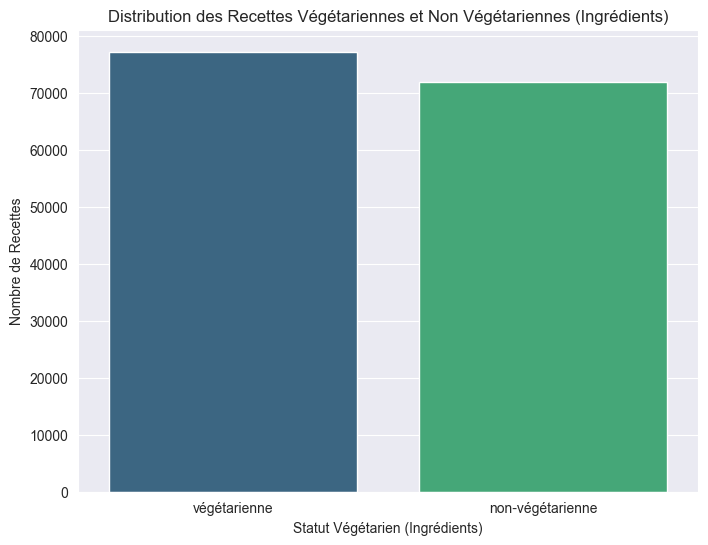

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\204782641.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vege_name", data=df, palette="viridis")


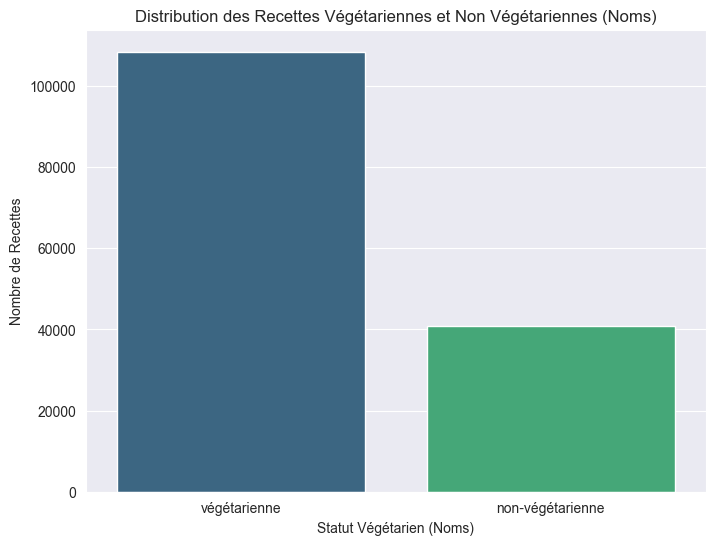

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\204782641.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vege_steps", data=df, palette="viridis")


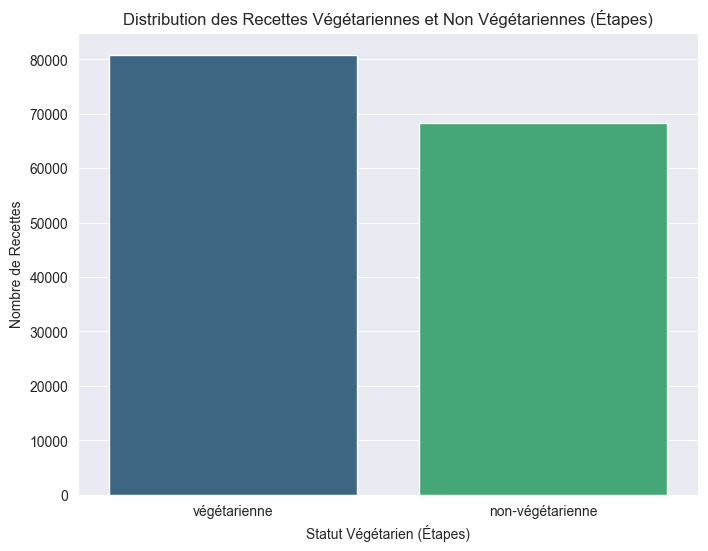

In [141]:
import pandas as pd
import re
from pyfood.utils import Shelf
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiser l'objet Shelf
shelf = Shelf(region='EU', lang_source='en', month_id=0)

# Taxons non végétariens
non_vegetarian_taxons = ['203', '211', '212', '213', '214']

# Fonction pour nettoyer et tokeniser le texte
def clean_and_tokenize(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokeniser en utilisant les espaces comme séparateur
    tokens = [word.strip() for word in text.split()]
    return tokens

# Fonction pour vérifier si une recette est végétarienne
def is_vegetarian(text):
    words_list = clean_and_tokenize(text)
    for word in words_list:
        try:
            food_info = shelf.get_food_info(word)
            taxon = food_info[2]
            if taxon in non_vegetarian_taxons:
                return "non-végétarienne"
        except:
            continue
    return "végétarienne"

# Appliquer la fonction à la colonne 'ingredients'
df["vege_ingr"] = df["ingredients"].apply(is_vegetarian)

# Appliquer la fonction à la colonne 'recipe_name'
df["vege_name"] = df["name"].apply(is_vegetarian)

# Appliquer la fonction à la colonne 'steps'
df["vege_steps"] = df["steps"].apply(is_vegetarian)

# Afficher le DataFrame avec les nouvelles colonnes
print(df)

# Créer un graphique à barres pour la variable 'vege_ingr'
plt.figure(figsize=(8, 6))
sns.countplot(x="vege_ingr", data=df, palette="viridis")
plt.title("Distribution des Recettes Végétariennes et Non Végétariennes (Ingrédients)")
plt.xlabel("Statut Végétarien (Ingrédients)")
plt.ylabel("Nombre de Recettes")
plt.show()

# Créer un graphique à barres pour la variable 'vege_name'
plt.figure(figsize=(8, 6))
sns.countplot(x="vege_name", data=df, palette="viridis")
plt.title("Distribution des Recettes Végétariennes et Non Végétariennes (Noms)")
plt.xlabel("Statut Végétarien (Noms)")
plt.ylabel("Nombre de Recettes")
plt.show()

# Créer un graphique à barres pour la variable 'vege_steps'
plt.figure(figsize=(8, 6))
sns.countplot(x="vege_steps", data=df, palette="viridis")
plt.title("Distribution des Recettes Végétariennes et Non Végétariennes (Étapes)")
plt.xlabel("Statut Végétarien (Étapes)")
plt.ylabel("Nombre de Recettes")
plt.show()

In [142]:
# Créer la variable binaire 'b3'
df["vege"] = ((df["vege_steps"] == "végétarienne") & 
            (df["vege_name"] == "végétarienne") & 
            (df["vege_ingr"] == "végétarienne")).astype(int)

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\3168454457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vege", data=df, palette="viridis")


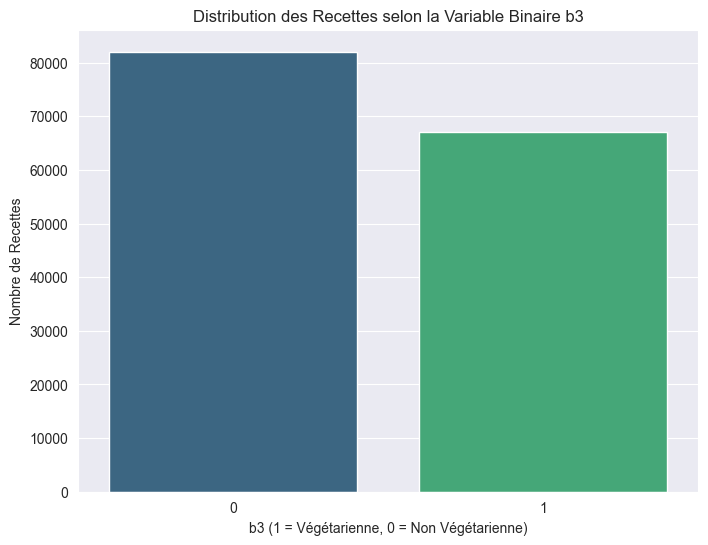

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres pour la variable 'b3'
plt.figure(figsize=(8, 6))
sns.countplot(x="vege", data=df, palette="viridis")
plt.title("Distribution des Recettes selon la Variable Binaire b3")
plt.xlabel("b3 (1 = Végétarienne, 0 = Non Végétarienne)")
plt.ylabel("Nombre de Recettes")
plt.show()

In [144]:
import pyfood

# Afficher le contenu du package pyfood
print(dir(pyfood))

['Shelf', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'utils']


In [145]:
# Compter les occurrences de chaque recipe_id
recipe_counts = df['id'].value_counts()

# Filtrer pour trouver les recipe_id qui apparaissent plusieurs fois
duplicates = recipe_counts[recipe_counts > 1]

# Afficher les résultats
if not duplicates.empty:
    print("Les recipe_id qui apparaissent plusieurs fois et leur nombre d'occurrences :")
    print(duplicates)
else:
    print("Aucun recipe_id en double trouvé.")


Aucun recipe_id en double trouvé.


In [146]:
from pyfood import utils

# Afficher les attributs et fonctions disponibles dans le module utils
print(dir(utils))

['Dict', 'List', 'Optional', 'Shelf', 'Tuple', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cosine_similarity', 'csr_matrix', 'fp', 'json', 'lists2object', 'load_npz', 'np', 'nutrimap', 'os', 'pickle', 'prefix', 're', 'str2float', 'str2ngrams', 'unidecode', 'units', 'urllib', 'vnr']


In [147]:
# Afficher les premières lignes du DataFrame
df.shape

(149229, 24)

       vegan_steps vegan_name vegan_ingr  vegan
0        non-vegan      vegan  non-vegan      0
1        non-vegan      vegan  non-vegan      0
3            vegan      vegan      vegan      1
6            vegan      vegan      vegan      1
10           vegan      vegan      vegan      1
...            ...        ...        ...    ...
231632       vegan      vegan      vegan      1
231633       vegan      vegan      vegan      1
231634       vegan      vegan      vegan      1
231635   non-vegan      vegan  non-vegan      0
231636       vegan      vegan      vegan      1

[149229 rows x 4 columns]


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1035969455.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vegan", data=df, palette="viridis")


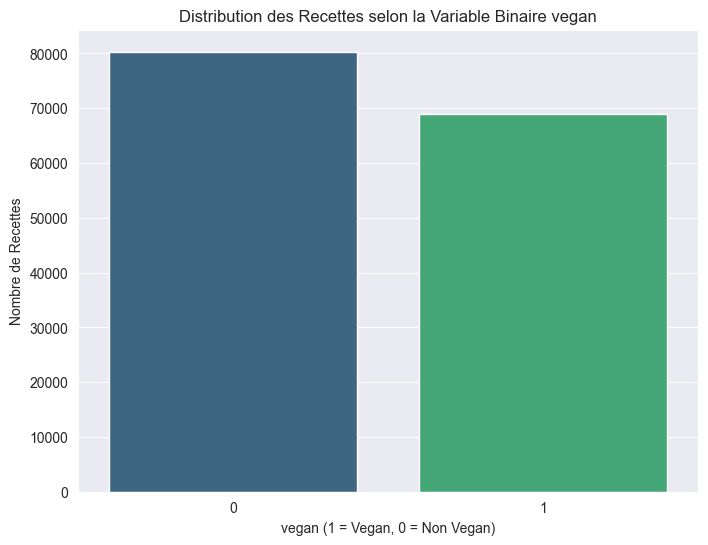

In [148]:
import pandas as pd
import re
from pyfood.utils import Shelf
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiser l'objet Shelf
shelf = Shelf(region='EU', lang_source='en', month_id=0)

# Taxons non véganes
non_vegan_taxons = ['201', '202']

# Fonction pour nettoyer et tokeniser le texte
def clean_and_tokenize(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokeniser en utilisant les espaces comme séparateur
    tokens = [word.strip() for word in text.split()]
    return tokens

# Fonction pour vérifier si une recette est végane
def is_vegan(text):
    words_list = clean_and_tokenize(text)
    for word in words_list:
        try:
            food_info = shelf.get_food_info(word)
            taxon = food_info[2]
            if taxon in non_vegan_taxons:
                return "non-vegan"
        except:
            continue
    return "vegan"

# Appliquer la fonction à la colonne 'ingredients'
df["vegan_ingr"] = df["ingredients"].apply(is_vegan)

# Appliquer la fonction à la colonne 'recipe_name'
df["vegan_name"] = df["name"].apply(is_vegan)

# Appliquer la fonction à la colonne 'steps'
df["vegan_steps"] = df["steps"].apply(is_vegan)

# Créer la variable binaire 'vegan' pour végan
df["vegan"] = ((df["vegan_steps"] == "vegan") & 
               (df["vegan_name"] == "vegan") & 
               (df["vegan_ingr"] == "vegan")).astype(int)

# Afficher le DataFrame avec les nouvelles colonnes
print(df[["vegan_steps", "vegan_name", "vegan_ingr", "vegan"]])

# Créer un graphique à barres pour la variable 'vegan'
plt.figure(figsize=(8, 6))
sns.countplot(x="vegan", data=df, palette="viridis")
plt.title("Distribution des Recettes selon la Variable Binaire vegan")
plt.xlabel("vegan (1 = Vegan, 0 = Non Vegan)")
plt.ylabel("Nombre de Recettes")
plt.show()

              vege_steps     vege_name         vege_ingr  vege vegan_steps  \
0           végétarienne  végétarienne      végétarienne     1   non-vegan   
1       non-végétarienne  végétarienne  non-végétarienne     0   non-vegan   
3           végétarienne  végétarienne      végétarienne     1       vegan   
6           végétarienne  végétarienne      végétarienne     1       vegan   
10          végétarienne  végétarienne      végétarienne     1       vegan   
...                  ...           ...               ...   ...         ...   
231632  non-végétarienne  végétarienne  non-végétarienne     0       vegan   
231633      végétarienne  végétarienne      végétarienne     1       vegan   
231634      végétarienne  végétarienne      végétarienne     1       vegan   
231635      végétarienne  végétarienne  non-végétarienne     0   non-vegan   
231636      végétarienne  végétarienne      végétarienne     1       vegan   

       vegan_name vegan_ingr  vegan  vegan_final  
0           

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1691205651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="vegan_final", data=df, palette="viridis")


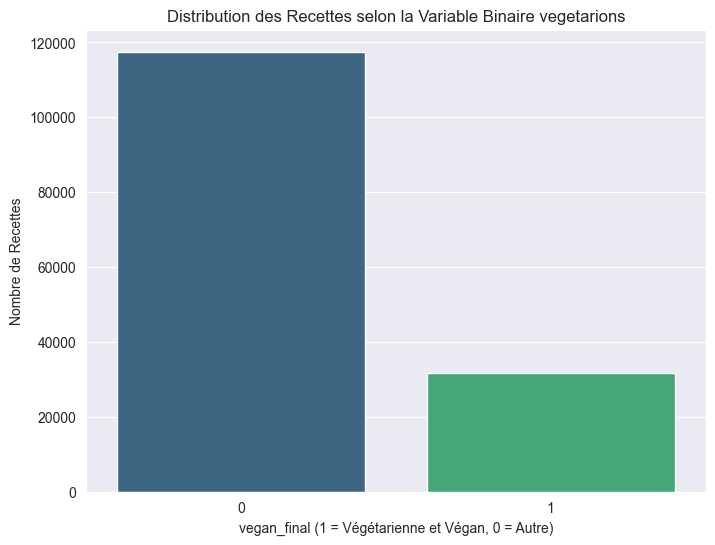

In [149]:
# Créer la variable binaire 'vegetarions' qui vaut 1 si 'b3' et 'vegan' valent 1
df["vegan_final"] = ((df["vege"] == 1) & (df["vegan"] == 1)).astype(int)

# Afficher le DataFrame avec les nouvelles colonnes
print(df[["vege_steps", "vege_name", "vege_ingr", "vege", "vegan_steps", "vegan_name", "vegan_ingr", "vegan", "vegan_final"]])


# Créer un graphique à barres pour la variable 'vegetarions'
plt.figure(figsize=(8, 6))
sns.countplot(x="vegan_final", data=df, palette="viridis")
plt.title("Distribution des Recettes selon la Variable Binaire vegetarions")
plt.xlabel("vegan_final (1 = Végétarienne et Végan, 0 = Autre)")
plt.ylabel("Nombre de Recettes")
plt.show()

In [150]:
df.shape

(149229, 29)

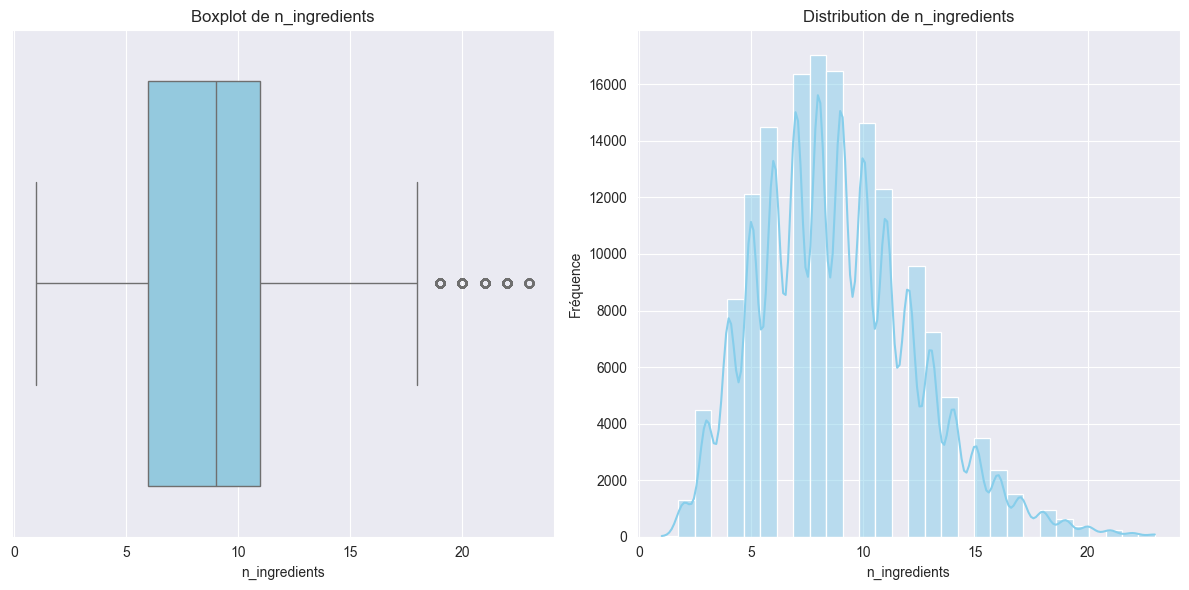

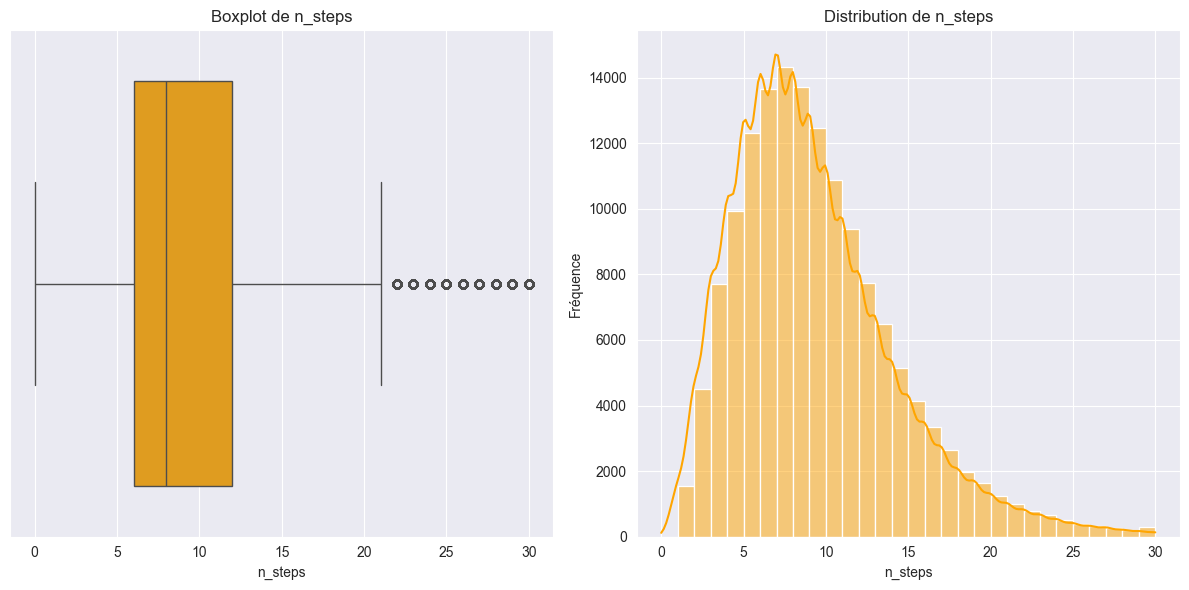

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Fonction pour visualiser la distribution et les outliers
def visualize_distribution(df, column, color="blue"):
    """
    Affiche un boxplot et un histogramme pour une colonne donnée.
    Args:
        df (pd.DataFrame): DataFrame d'entrée.
        column (str): Nom de la colonne à visualiser.
        color (str): Couleur des graphiques.
    """
    plt.figure(figsize=(12, 6))

    # Boxplot pour visualiser les outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column, color=color)
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

    # Histogramme pour visualiser la distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=30, kde=True, color=color)
    plt.title(f"Distribution de {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")

    plt.tight_layout()
    plt.show()


# Visualiser le nombre d'ingrédients
visualize_distribution(df, "n_ingredients", color="skyblue")

# Visualiser le nombre d'étapes
visualize_distribution(df, "n_steps", color="orange")

In [152]:
import pandas as pd

# Charger les données

# Filtrer les recettes avec 0 étapes
recipes_with_zero_steps = df[df["n_steps"] == 0]

# Afficher les recettes avec 0 étapes
print("Recettes avec 0 étapes :")
print(recipes_with_zero_steps)

# Optionnel : Afficher le nombre de recettes avec 0 étapes
print(f"\nNombre total de recettes avec 0 étapes : {len(recipes_with_zero_steps)}")

Recettes avec 0 étapes :
                  name      id  minutes  contributor_id   submitted  \
3381  all season bread  176767       90          331268  2006-07-10   

                                                   tags  \
3381  ['time-to-make', 'course', 'main-ingredient', ...   

                                      nutrition  n_steps steps  \
3381  [198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]        0    []   

                                            description  ... log_minutes  \
3381  just change the fruit/vegetable in this recipe...  ...    1.529932   

         vege_ingr     vege_name    vege_steps  vege  vegan_ingr  vegan_name  \
3381  végétarienne  végétarienne  végétarienne     1       vegan       vegan   

      vegan_steps  vegan  vegan_final  
3381        vegan      1            1  

[1 rows x 29 columns]

Nombre total de recettes avec 0 étapes : 1


In [153]:
import pandas as pd

# Créer une nouvelle variable d'interaction
df["interaction_steps_ingredients"] = df["n_steps"] * df["n_ingredients"] * df["log_minutes"]

# Afficher un aperçu du DataFrame
print(df.head())


                                          name      id  minutes  \
0   arriba   baked winter squash mexican style  137739       55   
1             a bit different  breakfast pizza   31490       30   
3                           alouette  potatoes   59389       45   
6                        aww  marinated olives   25274       15   
10                 berry  good sandwich spread  109439        5   

    contributor_id   submitted  \
0            47892  2005-09-16   
1            26278  2002-06-17   
3            68585  2003-04-14   
6            21730  2002-04-14   
10           49168  2005-01-25   

                                                 tags  \
0   ['60-minutes-or-less', 'time-to-make', 'course...   
1   ['30-minutes-or-less', 'time-to-make', 'course...   
3   ['60-minutes-or-less', 'time-to-make', 'course...   
6   ['15-minutes-or-less', 'time-to-make', 'course...   
10  ['15-minutes-or-less', 'time-to-make', 'course...   

                                    nutrition  n_

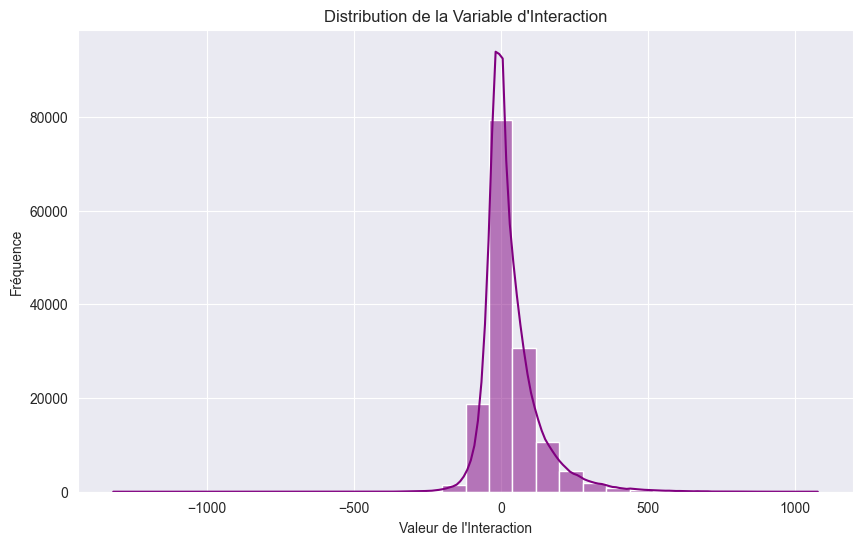

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["interaction_steps_ingredients"], bins=30, kde=True, color="purple")
plt.title("Distribution de la Variable d'Interaction")
plt.xlabel("Valeur de l'Interaction")
plt.ylabel("Fréquence")
plt.show()


Ce nouveau graphique montre une distribution beaucoup plus plausible pour la variable d'interaction, avec des valeurs majoritairement concentrées dans les petites plages (proche de zéro) et une décroissance progressive. Cela semble être une distribution asymétrique typique.

Interprétation :
Concentration des valeurs basses :

La majorité des recettes ont un nombre modéré de pas, d'ingrédients et de minutes, ce qui conduit à des valeurs d'interaction plus faibles.
Longue queue vers la droite :

Certaines recettes, plus complexes (plus d'étapes, d'ingrédients, et/ou de temps), entraînent des valeurs d'interaction élevées.

In [155]:
veg_interaction = df[df["vegan_final"] == 1]["interaction_steps_ingredients"]
non_veg_interaction = df[df["vegan_final"] == 0]["interaction_steps_ingredients"]

print(f"Moyenne vegan : {veg_interaction.mean()}")
print(f"Moyenne non-vegan : {non_veg_interaction.mean()}")

Moyenne vegan : 0.5071223761683039
Moyenne non-vegan : 39.49656206443986


In [156]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(veg_interaction, non_veg_interaction)
print(f"T-statistique : {t_stat}, P-valeur : {p_value}")

T-statistique : -66.28255048120087, P-valeur : 0.0


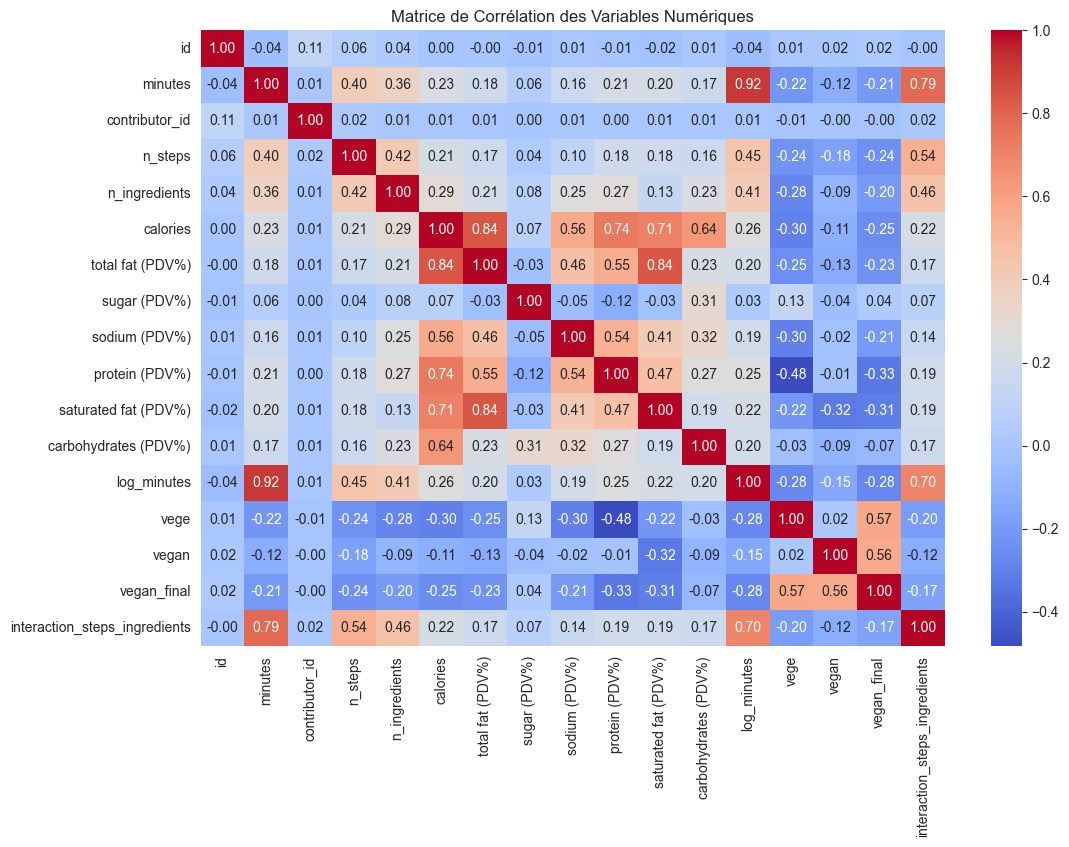

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()

In [158]:
from scipy.stats import pearsonr

# Liste des variables à tester
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Tests de corrélation deux à deux
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        correlation, p_value = pearsonr(df[var1], df[var2])
        print(
            f"Corrélation entre {var1} et {var2} : r = {correlation:.3f}, p = {p_value:.3e}"
        )

Corrélation entre calories et sodium (PDV%) : r = 0.565, p = 0.000e+00
Corrélation entre calories et protein (PDV%) : r = 0.738, p = 0.000e+00
Corrélation entre calories et total fat (PDV%) : r = 0.842, p = 0.000e+00
Corrélation entre calories et saturated fat (PDV%) : r = 0.711, p = 0.000e+00
Corrélation entre calories et carbohydrates (PDV%) : r = 0.640, p = 0.000e+00
Corrélation entre sodium (PDV%) et protein (PDV%) : r = 0.535, p = 0.000e+00
Corrélation entre sodium (PDV%) et total fat (PDV%) : r = 0.463, p = 0.000e+00
Corrélation entre sodium (PDV%) et saturated fat (PDV%) : r = 0.408, p = 0.000e+00
Corrélation entre sodium (PDV%) et carbohydrates (PDV%) : r = 0.322, p = 0.000e+00
Corrélation entre protein (PDV%) et total fat (PDV%) : r = 0.551, p = 0.000e+00
Corrélation entre protein (PDV%) et saturated fat (PDV%) : r = 0.471, p = 0.000e+00
Corrélation entre protein (PDV%) et carbohydrates (PDV%) : r = 0.269, p = 0.000e+00
Corrélation entre total fat (PDV%) et saturated fat (PDV%

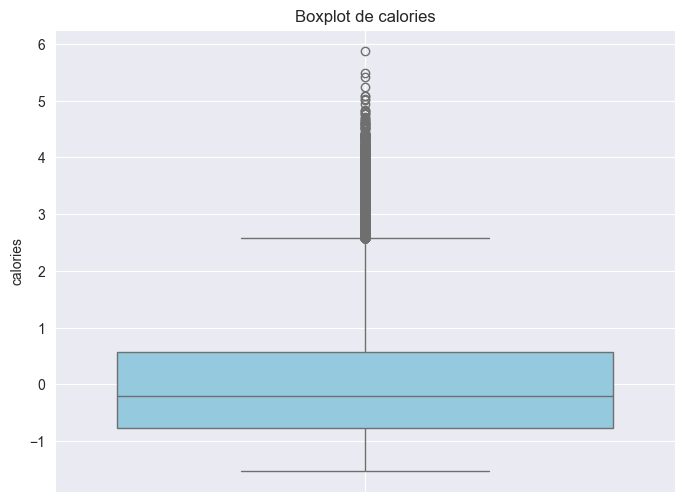

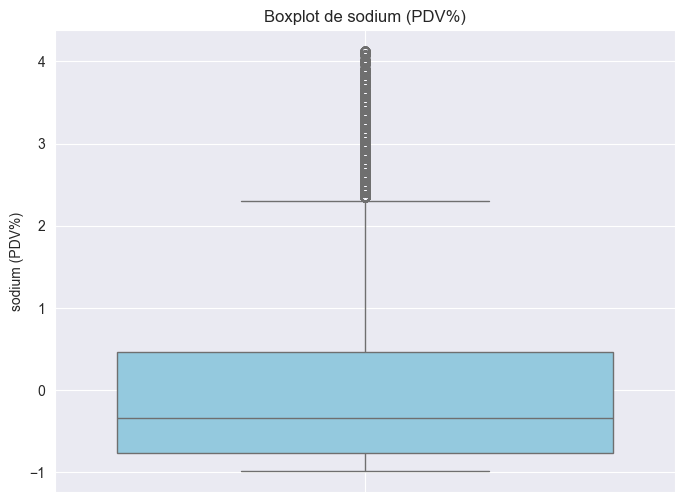

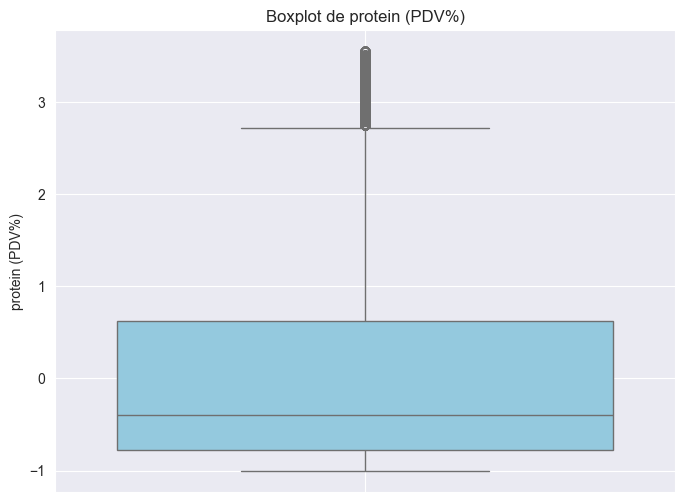

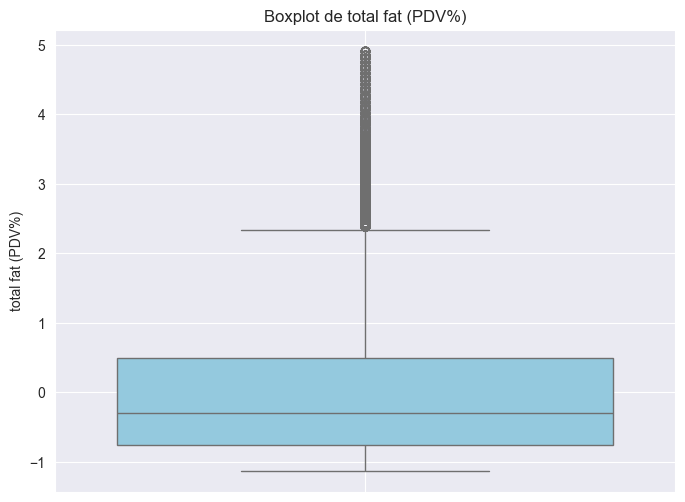

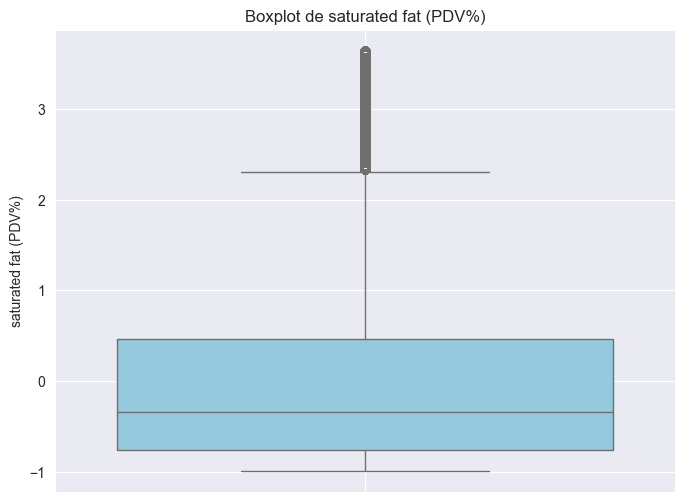

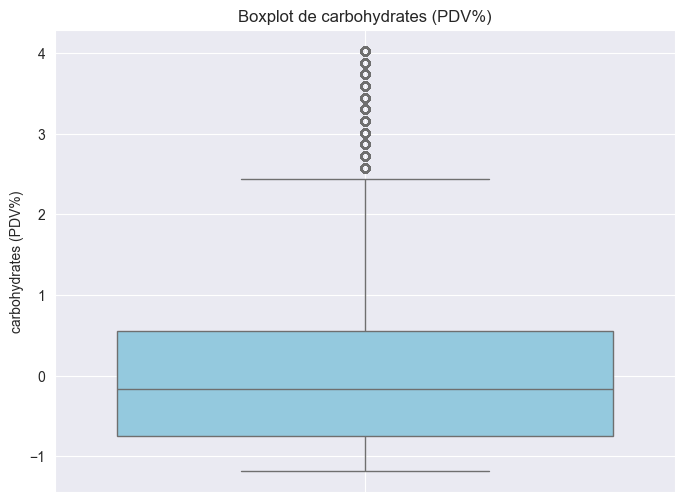

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à visualiser
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Création des boxplots
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=var, color="skyblue")
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

In [164]:
from scipy.stats import pointbiserialr

# Test avec calories
correlation_calories, p_value_calories = pointbiserialr(
    df["vegan_final"], df["calories"]
)
print(
    f"Corrélation entre vegan_final et calories : r = {correlation_calories:.3f}, p = {p_value_calories:.3e}"
)

# Test avec protein
correlation_protein, p_value_protein = pointbiserialr(
    df["vegan_final"], df["protein (PDV%)"]
)
print(
    f"Corrélation entre vegan_final et protein : r = {correlation_protein:.3f}, p = {p_value_protein:.3e}"
)

Corrélation entre vegan_final et calories : r = -0.253, p = 0.000e+00
Corrélation entre vegan_final et protein : r = -0.331, p = 0.000e+00


In [165]:
from scipy.stats import pointbiserialr

# Test avec calories
correlation_calories, p_value_calories = pointbiserialr(
    df["vege"], df["calories"]
)
print(
    f"Corrélation entre vege et calories : r = {correlation_calories:.3f}, p = {p_value_calories:.3e}"
)

# Test avec protein
correlation_protein, p_value_protein = pointbiserialr(
    df["vege"], df["protein (PDV%)"]
)
print(
    f"Corrélation entre vege et protein : r = {correlation_protein:.3f}, p = {p_value_protein:.3e}"
)

Corrélation entre vege et calories : r = -0.303, p = 0.000e+00
Corrélation entre vege et protein : r = -0.484, p = 0.000e+00


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\2007634393.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variable", y="Valeur", data=df_melted, palette="Set2")


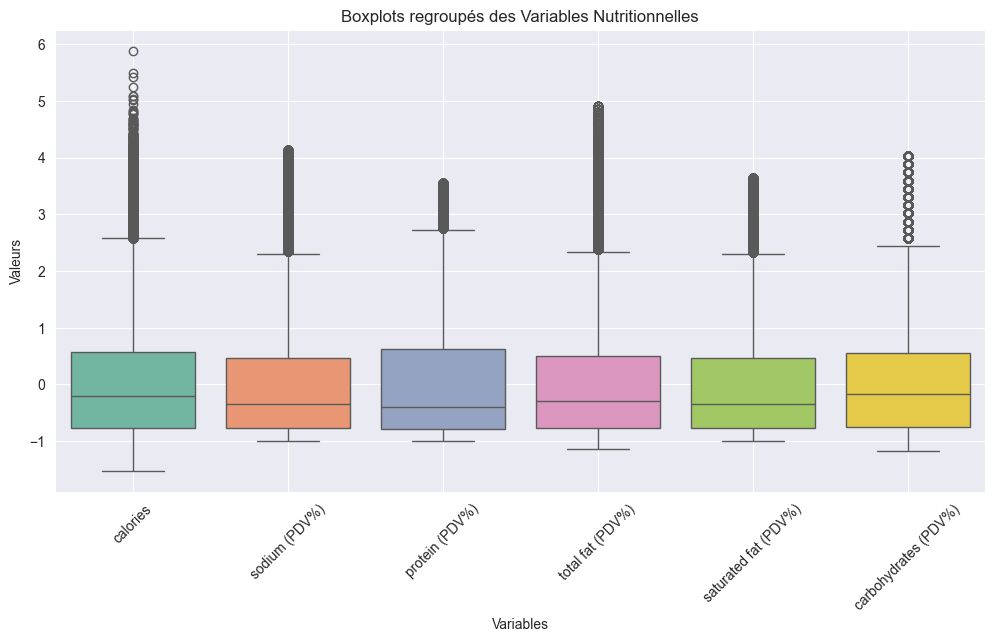

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à visualiser
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Réorganiser les données pour Seaborn
df_melted = df[variables].melt(var_name="Variable", value_name="Valeur")

# Création d'un graphique avec tous les boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valeur", data=df_melted, palette="Set2")
plt.title("Boxplots regroupés des Variables Nutritionnelles")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [169]:
from scipy.stats import f_oneway

# Liste des variables à tester avec ANOVA
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
]

# Effectuer les tests ANOVA
for var in variables:
    group_veg = df[df["vegan_final"] == 1][var]
    group_non_veg = df[df["vegan_final"] == 0][var]
    f_stat, p_value = f_oneway(group_veg, group_non_veg)
    print(f"ANOVA pour {var} (vegan_final) : F = {f_stat:.3f}, p = {p_value:.3e}")

ANOVA pour calories (categorie_vegetarien) : F = nan, p = nan
ANOVA pour sodium (PDV%) (categorie_vegetarien) : F = nan, p = nan
ANOVA pour protein (PDV%) (categorie_vegetarien) : F = nan, p = nan
ANOVA pour total fat (PDV%) (categorie_vegetarien) : F = nan, p = nan
ANOVA pour saturated fat (PDV%) (categorie_vegetarien) : F = nan, p = nan
ANOVA pour carbohydrates (PDV%) (categorie_vegetarien) : F = nan, p = nan


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\3610729915.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(group_veg, group_non_veg)


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1829585430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vege", y=var, data=df, palette="Set2")
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1829585430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vege", y=var, data=df, palette="Set2")
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1829585430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vege", y=var, data=df, palette="Set2")


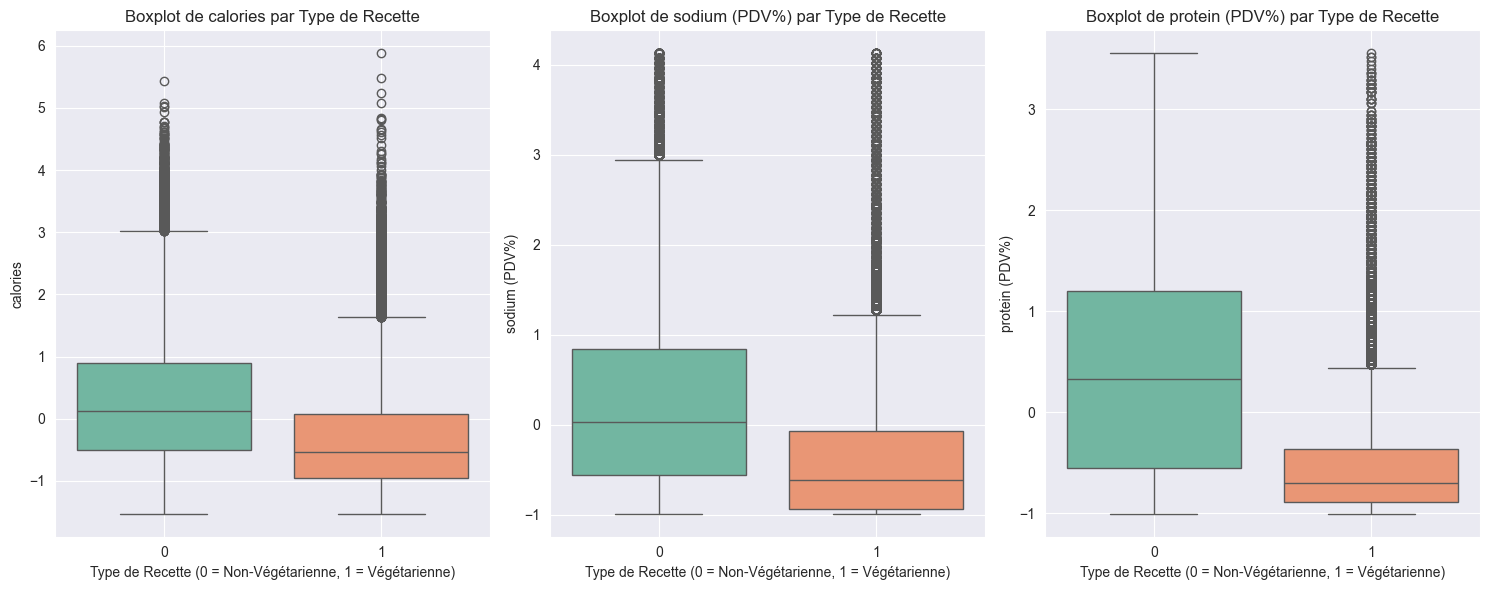

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à visualiser
variables = ["calories", "sodium (PDV%)", "protein (PDV%)"]

# Création de boxplots regroupés
plt.figure(figsize=(15, 6))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)  # Subplot pour afficher plusieurs graphiques côte à côte
    sns.boxplot(x="vege", y=var, data=df, palette="Set2")
    plt.title(f"Boxplot de {var} par Type de Recette")
    plt.xlabel("Type de Recette (0 = Non-Végétarienne, 1 = Végétarienne)")
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1832391195.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vegan_final", y=var, data=df, palette="Set2")
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1832391195.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vegan_final", y=var, data=df, palette="Set2")
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1832391195.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="vegan_final", y=var, data=df, palette="Set2")


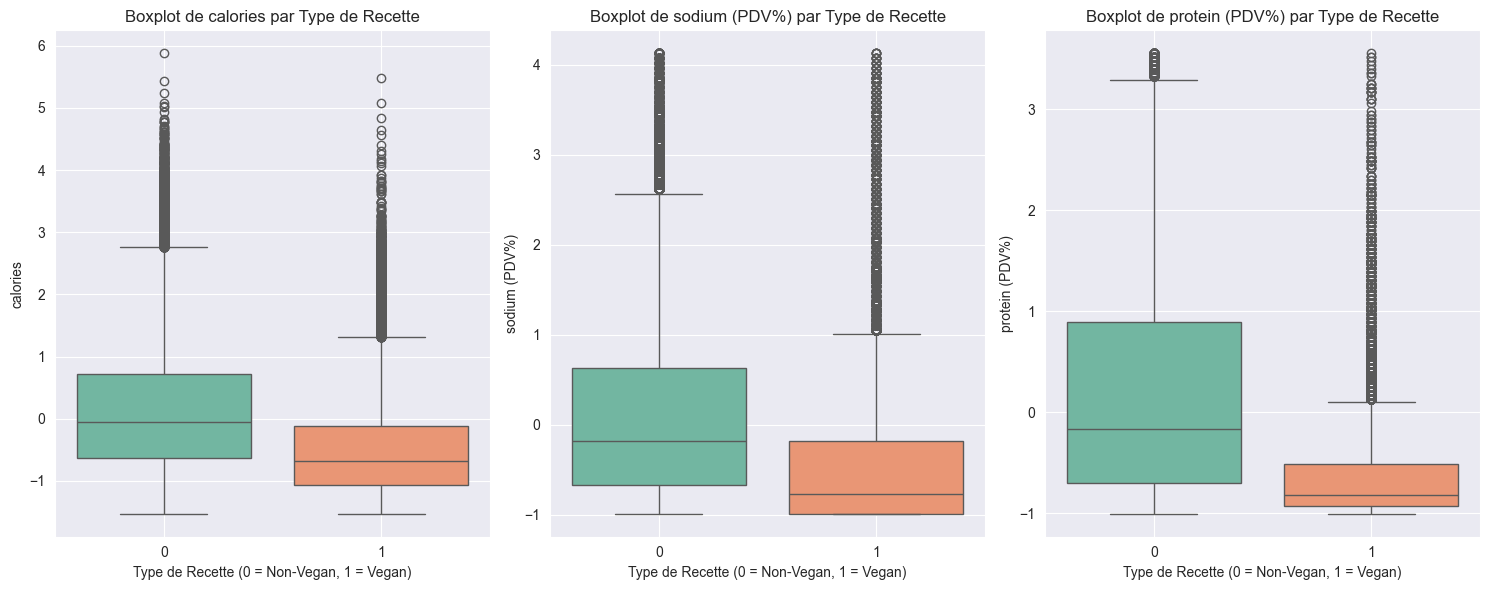

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à visualiser
variables = ["calories", "sodium (PDV%)", "protein (PDV%)"]

# Création de boxplots regroupés
plt.figure(figsize=(15, 6))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)  # Subplot pour afficher plusieurs graphiques côte à côte
    sns.boxplot(x="vegan_final", y=var, data=df, palette="Set2")
    plt.title(f"Boxplot de {var} par Type de Recette")
    plt.xlabel("Type de Recette (0 = Non-Vegan, 1 = Vegan)")
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

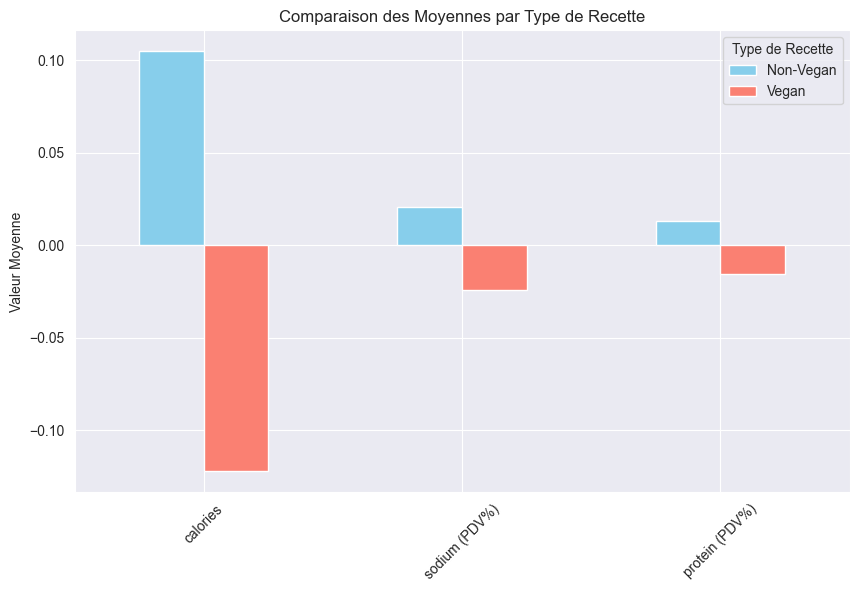

In [172]:
# Calcul des moyennes pour chaque variable et chaque groupe
means = df.groupby("vegan")[variables].mean()

# Création d'un graphique en barres
plt.figure(figsize=(10, 6))
means.T.plot(kind="bar", figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Comparaison des Moyennes par Type de Recette")
plt.ylabel("Valeur Moyenne")
plt.xticks(rotation=45)
plt.legend(["Non-Vegan", "Vegan"], title="Type de Recette")
plt.grid(True)
plt.show()

analyse 

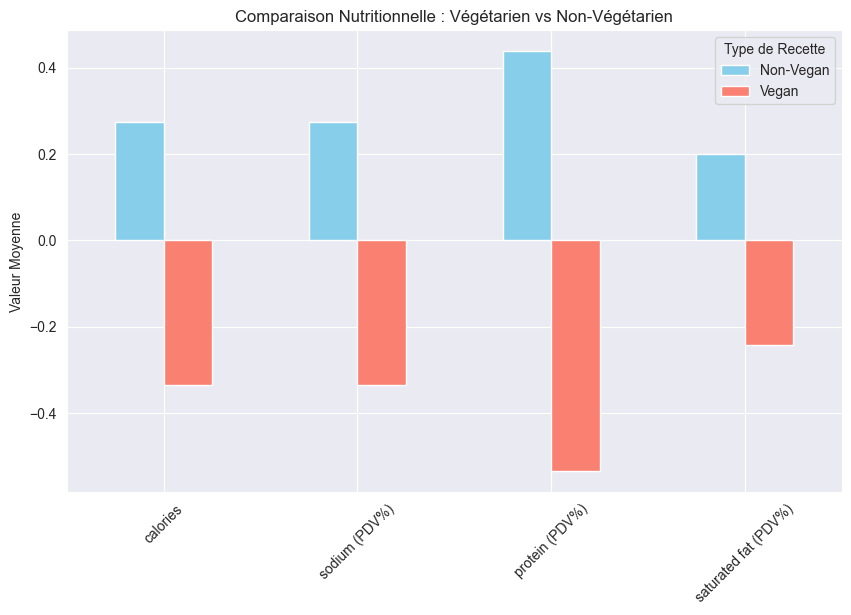

In [173]:
# Moyennes par groupe
means = df.groupby("vege")[
    ["calories", "sodium (PDV%)", "protein (PDV%)", "saturated fat (PDV%)"]
].mean()

# Bar plot des moyennes
means.T.plot(kind="bar", figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Comparaison Nutritionnelle : Végétarien vs Non-Végétarien")
plt.ylabel("Valeur Moyenne")
plt.xticks(rotation=45)
plt.legend(["Non-Vegan", "Vegan"], title="Type de Recette")
plt.grid(True)
plt.show()

In [76]:
# Filtrer les recettes véganes où 'vegetarions' est égal à 1
vegan_recipes = df[df["vegetarions"] == 1]

# Afficher le nouveau dataset avec les recettes véganes
print(vegan_recipes)

                                                name      id  minutes  \
3                                 alouette  potatoes   59389       45   
6                              aww  marinated olives   25274       15   
10                       berry  good sandwich spread  109439        5   
14                           calm your nerves  tonic   39959        5   
17                                    chinese  candy   23933       15   
...                                              ...     ...      ...   
231629                                  zydeco salad  367912        5   
231630                                  zydeco sauce  357451       15   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
3                68585  2003-04-14   
6                21730  2002-04-14   
10       

In [175]:
# Compter les recettes végétariennes (vegetarian_binary = 1)
num_vegetarian = df[df['vege'] == 1].shape[0]

# Compter les recettes véganes (vegan = 1)
num_vegan = df[df['vegan_final'] == 1].shape[0]

# Compter les autres recettes (non-végétariennes)
num_non_vegetarian = df[df['vege'] == 0].shape[0]

# Afficher les résultats
print(f"Nombre de recettes végétariennes : {num_vegetarian}")
print(f"Nombre de recettes véganes (sous-ensemble des végétariennes) : {num_vegan}")
print(f"Nombre de recettes non-végétariennes : {num_non_vegetarian}")



Nombre de recettes végétariennes : 67175
Nombre de recettes véganes (sous-ensemble des végétariennes) : 31737
Nombre de recettes non-végétariennes : 82054


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\540117704.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variable", y="Valeur", data=df_melted, palette="Set2")


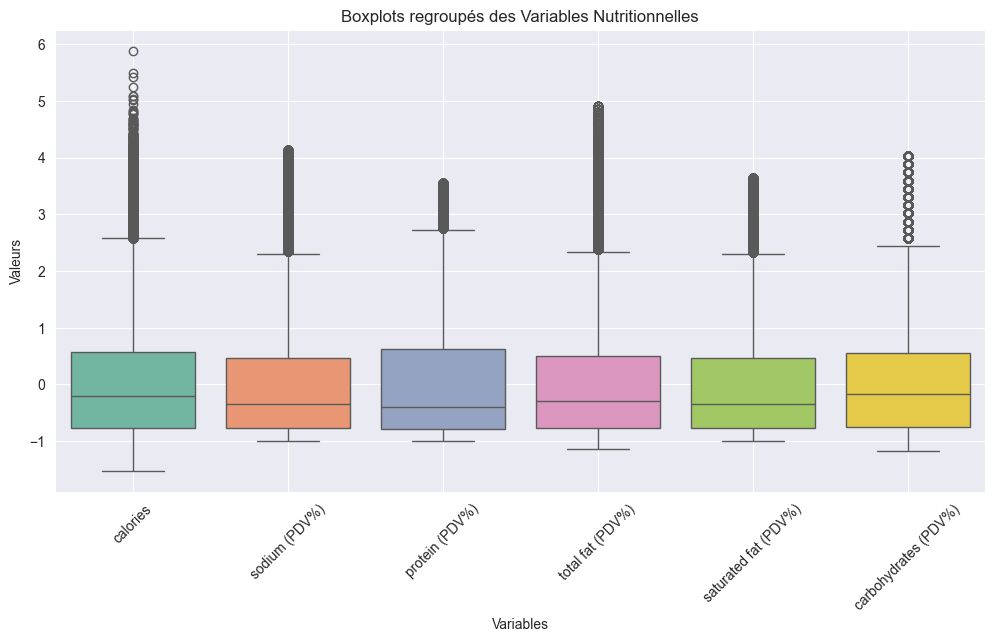

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à visualiser
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)"
]

# Réorganiser les données pour Seaborn
df_melted = df[variables].melt(var_name="Variable", value_name="Valeur")

# Création d'un graphique avec tous les boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valeur", data=df_melted, palette="Set2")
plt.title("Boxplots regroupés des Variables Nutritionnelles")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1195197999.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='recipe_type', y='calories', data=df, palette="Set2")


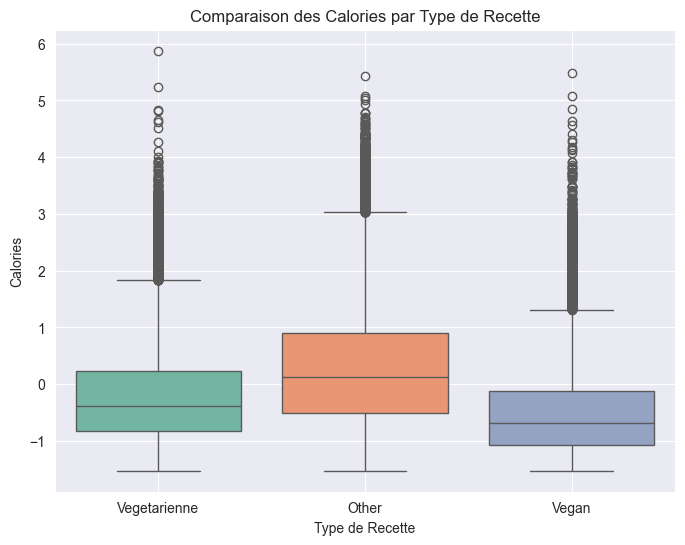

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter une nouvelle colonne pour identifier les types de recettes
df['recipe_type'] = df.apply(
    lambda row: 'Vegan' if row['vegan_final'] == 1 
                else 'Vegetarienne' if row['vege'] == 1 
                else 'Other', axis=1
)

# Création du boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='recipe_type', y='calories', data=df, palette="Set2")
plt.title("Comparaison des Calories par Type de Recette")
plt.xlabel("Type de Recette")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\2459672319.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='recipe_type', y='protein (PDV%)', data=df, ci="sd", palette="pastel")
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\2459672319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recipe_type', y='protein (PDV%)', data=df, ci="sd", palette="pastel")


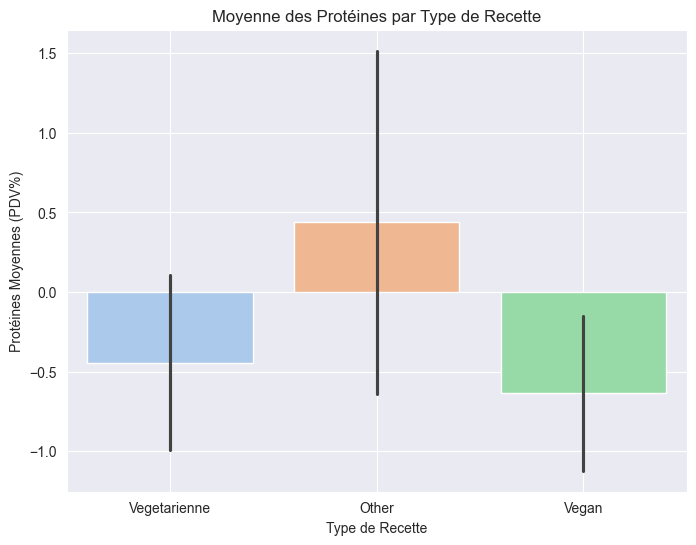

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter une nouvelle colonne pour identifier les types de recettes
df['recipe_type'] = df.apply(
    lambda row: 'Vegan' if row['vegan_final'] == 1 
                else 'Vegetarienne' if row['vege'] == 1 
                else 'Other', axis=1
)

# Création du graphique pour les protéines
plt.figure(figsize=(8, 6))
sns.barplot(x='recipe_type', y='protein (PDV%)', data=df, ci="sd", palette="pastel")
plt.title("Moyenne des Protéines par Type de Recette")
plt.xlabel("Type de Recette")
plt.ylabel("Protéines Moyennes (PDV%)")
plt.grid(True)
plt.show()


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1353317781.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1353317781.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\1353317781.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])


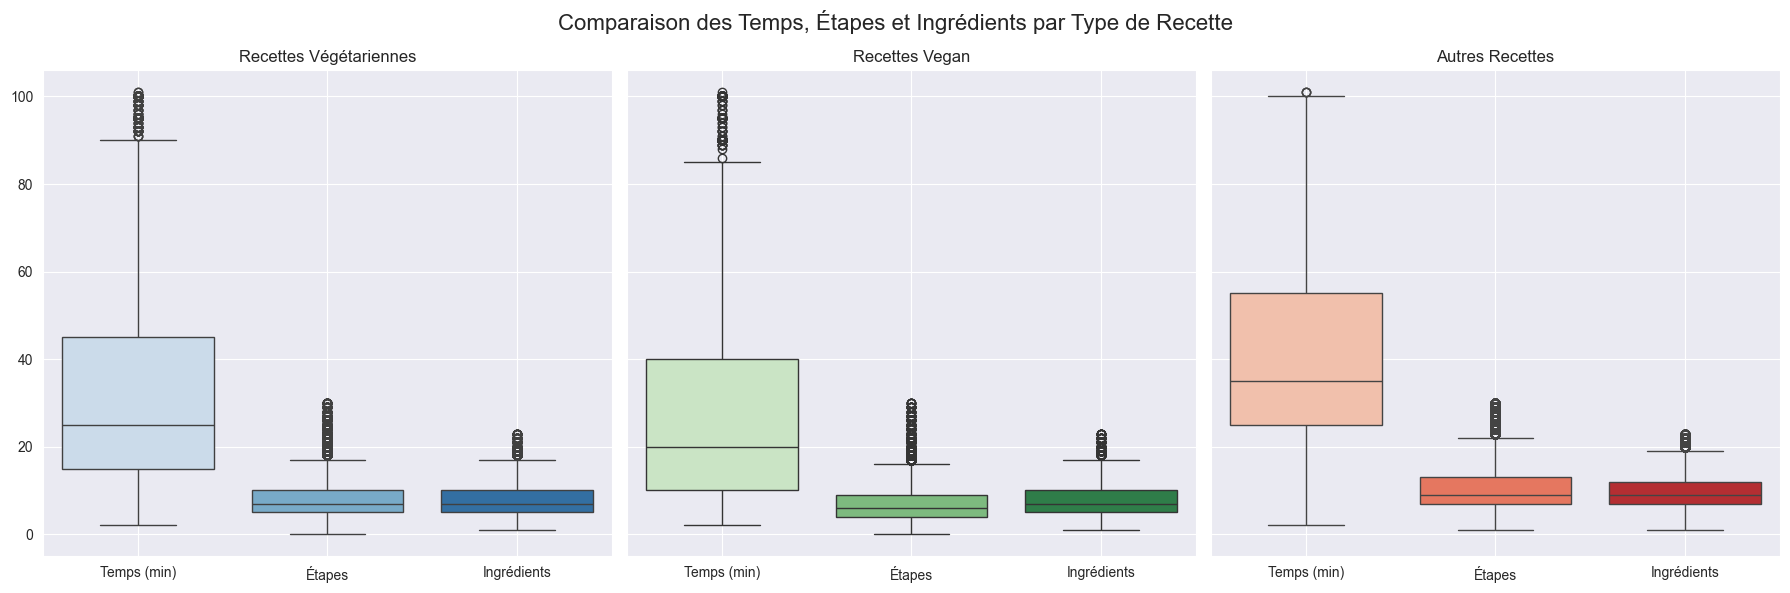

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour chaque type de recette
vegetarian_recipes = df[df['vege'] == 1]
vegan_recipes = df[df['vegan_final'] == 1]
other_recipes = df[(df['vege'] == 0) & (df['vegan_final'] == 0)]

# Définir les variables d'intérêt
variables = ['minutes', 'n_steps', 'n_ingredients']

# Créer une figure pour les sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Graphique pour les recettes végétariennes
sns.boxplot(data=vegetarian_recipes[variables], ax=axes[0], palette="Blues")
axes[0].set_title("Recettes Végétariennes")
axes[0].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])
axes[0].grid(True)

# Graphique pour les recettes vegan
sns.boxplot(data=vegan_recipes[variables], ax=axes[1], palette="Greens")
axes[1].set_title("Recettes Vegan")
axes[1].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])
axes[1].grid(True)

# Graphique pour les autres recettes
sns.boxplot(data=other_recipes[variables], ax=axes[2], palette="Reds")
axes[2].set_title("Autres Recettes")
axes[2].set_xticklabels(['Temps (min)', 'Étapes', 'Ingrédients'])
axes[2].grid(True)

# Titre général et ajustement de l'espacement
plt.suptitle("Comparaison des Temps, Étapes et Ingrédients par Type de Recette", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


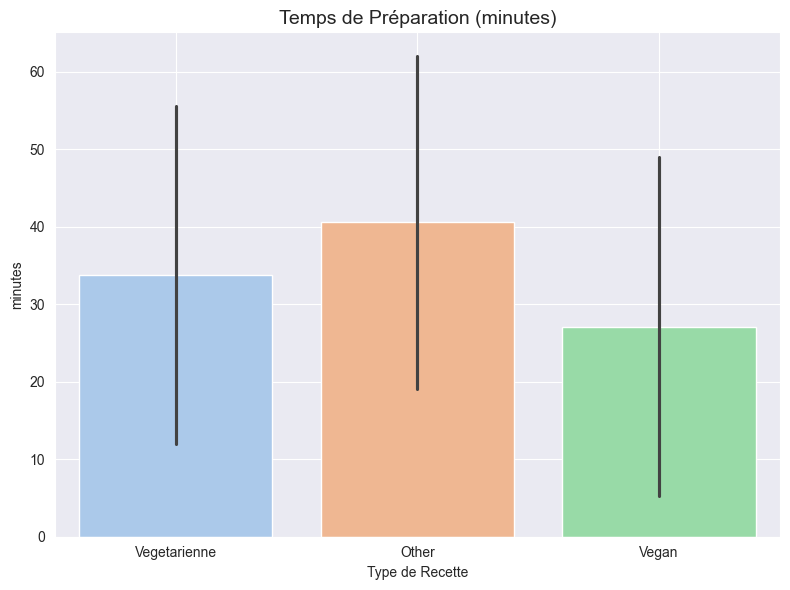

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


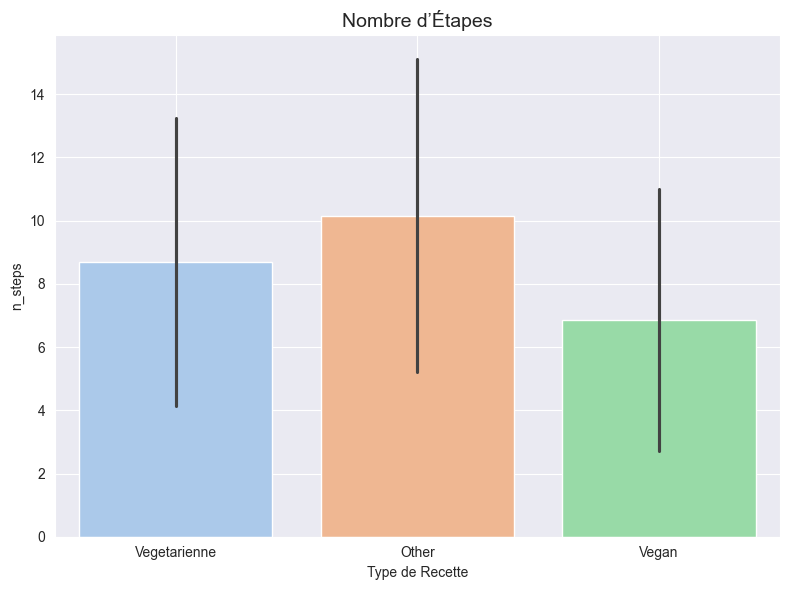

C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\awand\AppData\Local\Temp\ipykernel_11812\244362439.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


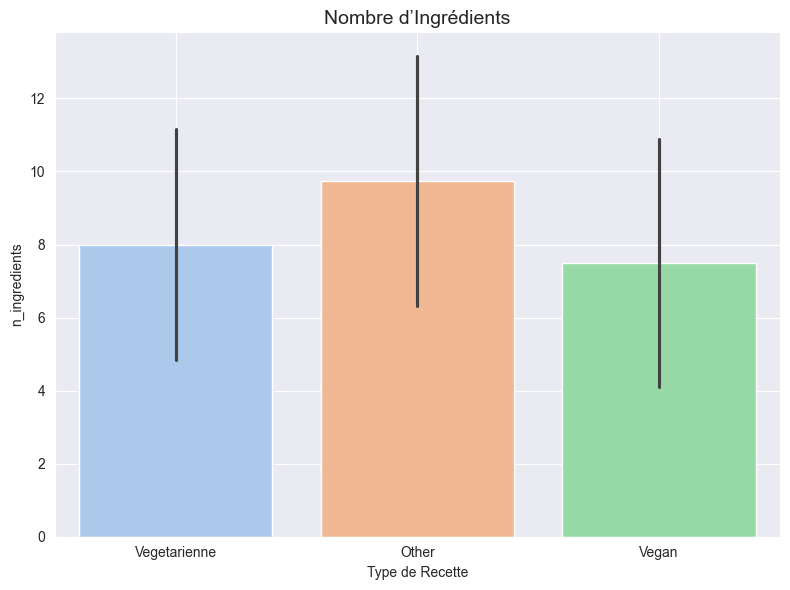

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter une nouvelle colonne pour identifier les types de recettes
df['recipe_type'] = df.apply(
    lambda row: 'Vegan' if row['vegan_final'] == 1
                else 'Vegetarienne' if row['vege'] == 1
                else 'Other', axis=1
)

# Variables d'intérêt
variables = ['minutes', 'n_steps', 'n_ingredients']
titles = ['Temps de Préparation (minutes)', 'Nombre d’Étapes', 'Nombre d’Ingrédients']

# Créer des graphiques séparés
for var, title in zip(variables, titles):
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x='recipe_type', y=var, data=df, ci="sd", palette="pastel"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Type de Recette")
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


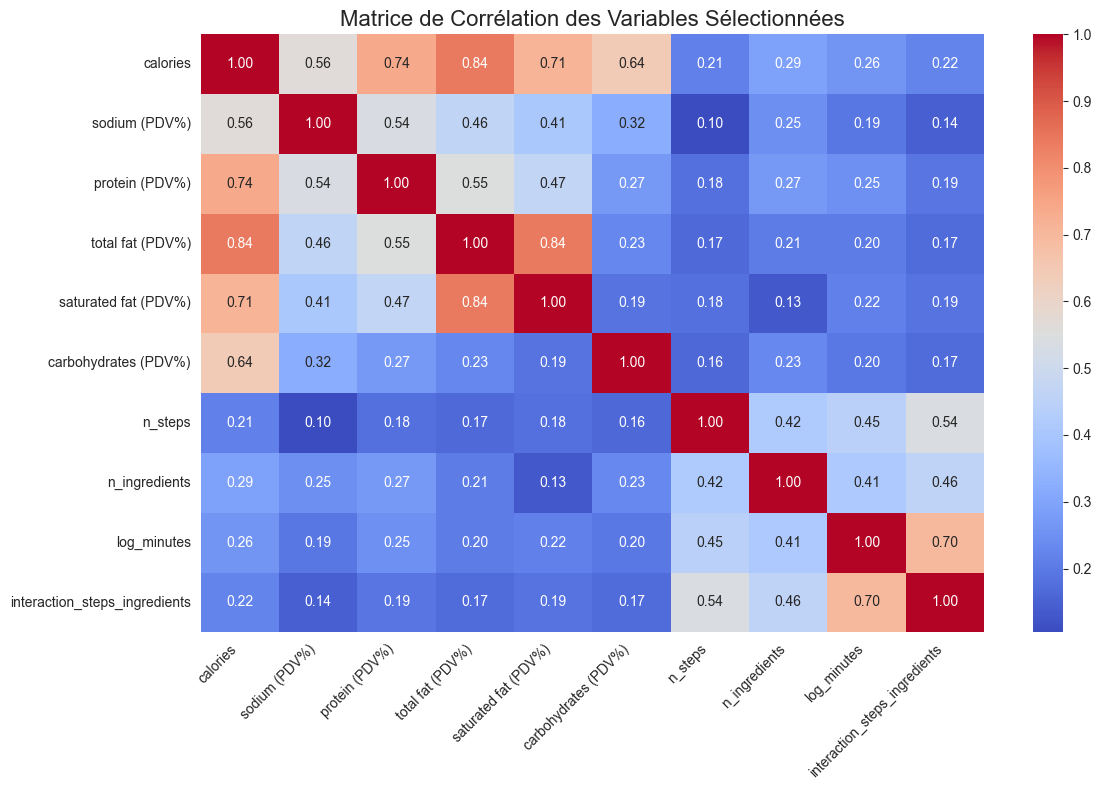

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables d'intérêt
variables = [
    "calories",
    "sodium (PDV%)",
    "protein (PDV%)",
    "total fat (PDV%)",
    "saturated fat (PDV%)",
    "carbohydrates (PDV%)",
    "n_steps",
    "n_ingredients",
    "log_minutes",
    "interaction_steps_ingredients"
]

# Filtrer les colonnes d'intérêt dans le DataFrame
correlation_data = df[variables]

# Calcul de la matrice de corrélation
correlation_matrix = correlation_data.corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation des Variables Sélectionnées", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


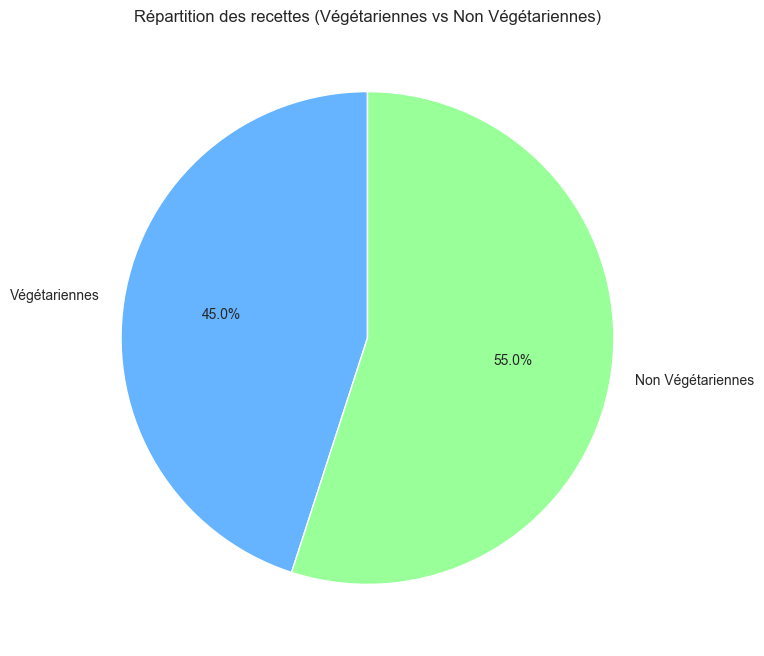

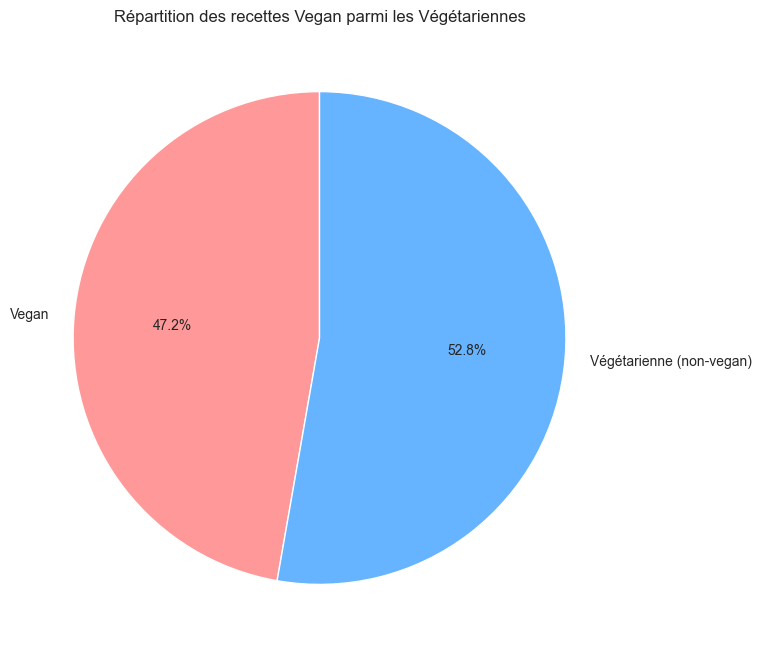

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : Si votre DataFrame 'df' contient les colonnes 'vegetarions' et 'b3'
# Assurez-vous que les données sont correctement formatées

# Compter les recettes végétariennes (b3 = 1)
num_vegetarian = df[df['vege'] == 1].shape[0]

# Compter les recettes véganes (vegetarions = 1)
num_vegan = df[df['vegan_final'] == 1].shape[0]

# Compter les autres recettes (non-végétariennes)
num_non_vegetarian = df[df['vege'] == 0].shape[0]

# Calculer les pourcentages pour le premier graphique
total = num_vegetarian + num_non_vegetarian
vegetarian_vs_other = [num_vegetarian, num_non_vegetarian]
vegetarian_vs_other_labels = ['Végétariennes', 'Non Végétariennes']
vegetarian_vs_other_percentages = [(count / total) * 100 for count in vegetarian_vs_other]

# Création du premier diagramme (Végétariennes vs Non Végétariennes)
plt.figure(figsize=(8, 8))
plt.pie(vegetarian_vs_other_percentages, labels=vegetarian_vs_other_labels, autopct="%.1f%%", startangle=90, colors=["#66b3ff", "#99ff99"])
plt.title("Répartition des recettes (Végétariennes vs Non Végétariennes)")
plt.show()

# Calculer les pourcentages pour le deuxième graphique parmi les végétariennes
vegan_among_vegetarian_percentages = [(num_vegan / num_vegetarian) * 100, ((num_vegetarian - num_vegan) / num_vegetarian) * 100]
vegan_among_vegetarian_labels = ['Vegan', 'Végétarienne (non-vegan)']

# Création du deuxième diagramme (Vegan parmi les Végétariennes)
plt.figure(figsize=(8, 8))
plt.pie(vegan_among_vegetarian_percentages, labels=vegan_among_vegetarian_labels, autopct="%.1f%%", startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Répartition des recettes Vegan parmi les Végétariennes")
plt.show()